In [1]:
import scipy.io as spio
import numpy as np
import sys, os

import matplotlib.pyplot as plt
import math

In [2]:
def plot_results(noisy, nn_output, clean, title=None):
    import numpy as np
    plt.figure(1, figsize=(20,20))
    #if title: plt.suptitle(title, fontsize=16)

    ax = plt.subplot(1, 3, 1)
    ax.set_title("noisy")
    # ax.imshow(np.log10(noisy), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(noisy), interpolation='none')
        
    ax = plt.subplot(1, 3, 2)
    ax.set_title("Neural Nets")
    # ax.imshow(np.log10(nn_output), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(nn_output), interpolation='none')
    
    ax = plt.subplot(1, 3, 3)
    ax.set_title("clean")
    # ax.imshow(np.log10(clean), clim=(-3,7), interpolation='none')
    ax.imshow(np.log10(clean), interpolation='none')

    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.9, top=0.88, wspace=0.2, hspace=0.2)
    #plt.subplot_tool()
    plt.show()

In [3]:
def convert_data2org(cur_mat, maxV = 25.0):
    import numpy as np
    cur_mat = cur_mat * maxV
    x = np.exp(cur_mat) - 1.0

    neg_idx = x < 0.0
    # x[neg_idx] = 0.0
    x[neg_idx] = 1e-8

    return x

In [4]:
def compute_snr(dat_px):
    samples = dat_px.shape[0]  # each data array is 3D tensor (N , im_h, im_w)
    snr_array = np.zeros((samples, 100), dtype=np.float32) # each sample, extract the mid line
    for i in xrange(samples):
        snr_array[i,:] = dat_px[i,49,:] # take the mid line of the 2d image

    means = np.mean(snr_array, axis=0)
    stds  = np.std(snr_array, axis=0)
    snr_result = 20. * (np.log10(means) - np.log10(stds))
    return snr_result

In [5]:
def log10_meanstd_(dat_px):
    samples = dat_px.shape[0]  # each data array is 3D tensor (N , im_h, im_w)
    snr_array = np.zeros((samples, 100), dtype=np.float32) # each sample, extract the mid line
    for i in xrange(samples):
        snr_array[i,:] = dat_px[i,49,:] # take the mid line of the 2d image

    log10_array = np.log10(snr_array)
    log10_means = np.mean(log10_array, axis=0)
    log10_std   = np.std(log10_array, axis=0)

    print "\n log10_means"
    for i in log10_means: print i

    print "\nlog10_std"
    for i in log10_std: print i

In [6]:
def log10_meanstd(dat_px):
    samples = dat_px.shape[0]  # each data array is 3D tensor (N , im_h, im_w)
    snr_array = np.zeros((samples, 100), dtype=np.float32) # each sample, extract the mid line
    for i in xrange(samples):
        snr_array[i,:] = dat_px[i,49,:] # take the mid line of the 2d image

    means = np.mean(snr_array, axis=0)
    #stds  = np.std(snr_array, axis=0)
    
    log10_means = np.log10(means)
    #log10_std   = np.log10(std)

    print "\n log10_means"
    for i in log10_means: print i

#    print "\nlog10_std"
#    for i in log10_std: print i

### raw data

In [7]:
#snr_dir = '/home/users/leiming/files_on_pangu/denoising_mcx/prepare_data/spie2d_customize/test_snr/het_absorber_square_x10/'
snr_dir = '../../../prepare_data/spie2d_customize/test_snr/het_absorber_square_x10_yy/'

In [8]:
dirp5 = snr_dir + '1e+05'
dirp6 = snr_dir + '1e+06'
dirp7 = snr_dir + '1e+07'

In [9]:
N, im_h, im_w = 100, 100, 100

raw_p5 = np.zeros((N, im_h, im_w))
raw_p6 = np.zeros((N, im_h, im_w))
raw_p7 = np.zeros((N, im_h, im_w))

In [10]:
for i in xrange(1, 101):
    # p5
    file_name = dirp5 + '/test[X].mat'
    file_name = file_name.replace('[X]', str(i))
    #print file_name
    noisymat = spio.loadmat(file_name, squeeze_me=True)
    noisyData = noisymat['currentImage']
    raw_p5[i-1, :,:] = noisyData
    
    
    # p6
    file_name = dirp6 + '/test[X].mat'
    file_name = file_name.replace('[X]', str(i))
    #print file_name
    noisymat = spio.loadmat(file_name, squeeze_me=True)
    noisyData = noisymat['currentImage']
    raw_p6[i-1, :,:] = noisyData
    
    # p7
    file_name = dirp7 + '/test[X].mat'
    file_name = file_name.replace('[X]', str(i))
    #print file_name
    noisymat = spio.loadmat(file_name, squeeze_me=True)
    noisyData = noisymat['currentImage']
    raw_p7[i-1, :,:] = noisyData    
    
    #break

In [11]:
#
# read snr data set
#
p5_snr = compute_snr(raw_p5)
p6_snr = compute_snr(raw_p6)
p7_snr = compute_snr(raw_p7)

In [12]:
print "\nsnr : p5\n"
for i in p5_snr: print i
    
print "\nsnr : p6\n"
for i in p6_snr: print i
    
print "\nsnr : p7\n"
for i in p7_snr: print i


snr : p5

52.08465
47.67439
43.855286
42.308662
41.368553
39.26677
38.56249
37.21843
37.553215
34.99197
34.137936
33.502636
31.596212
30.509386
30.46731
28.846146
27.867203
27.69392
24.26641
22.690033
23.389553
21.490799
19.975056
19.388247
17.631985
17.093777
15.765166
15.20103
13.425035
13.086073
11.539278
9.629681
8.927925
8.580303
4.976232
4.4474277
3.5917377
1.7693686
1.6652721
2.3306146
-0.5715922
1.9883502
-1.17535
-4.1635203
-4.0328884
-7.1352863
-5.5269003
-1.8324804
-6.9744253
-6.0966873
-3.566966
-4.622121
-8.127289
-6.618924
-7.0963097
-7.4870396
-9.55632
-9.768326
-11.328489
-9.183559
-13.2848215
-13.793187
-16.867163
-17.735693
-13.420525
-17.576887
-16.03098
-11.451035
-8.508468
-11.00071
-19.813576
-13.947134
-19.663292
-19.884678
-19.69465
-16.899277
-13.625498
-14.321151
-12.802863
-14.737692
-15.394287
-14.303589
-14.44797
-12.558327
-12.496195
-14.568062
-14.079857
-11.865177
-9.66465
-16.125603
-15.737591
-15.171013
-14.185228
-14.59012
-12.848635
-15.800896
-16.0

In [13]:
print "\nlog10_mean : p5\n"
log10_meanstd(raw_p5)

print "\nlog10_mean : p6\n"
log10_meanstd(raw_p6)

print "\nlog10_mean : p7\n"
log10_meanstd(raw_p7)


log10_mean : p5


 log10_means
7.9219074
7.722404
7.5044065
7.3261056
7.168865
7.023385
6.8847847
6.744298
6.5997405
6.4370885
6.230724
6.0140495
5.7976227
5.5835137
5.369808
5.159149
4.946644
4.7356014
4.5208173
4.307085
4.0962896
3.8848403
3.6712189
3.465698
3.2631972
3.0561726
2.8454676
2.6350152
2.4340382
2.2273588
2.0194235
1.7989163
1.5832869
1.3681574
1.1793742
0.9748538
0.78210694
0.5836321
0.34992853
0.1059635
-0.07082211
-0.3430575
-0.50367856
-0.6300016
-0.83098423
-0.95892936
-1.366176
-1.7193005
-1.7929747
-2.0184054
-2.1126854
-2.100428
-2.0234606
-2.3426516
-2.2520382
-2.3318524
-2.2129953
-2.302884
-2.3497162
-2.3908935
-2.6683338
-2.6086805
-2.4560208
-2.373661
-2.791467
-2.7079628
-2.9110842
-3.5000327
-3.6266932
-3.3398995
-1.7367977
-3.0889106
-1.9153255
-1.8278219
-1.8280141
-3.1153944
-3.4982054
-3.4389462
-3.5202165
-3.602645
-3.497447
-3.9296272
-4.3746285
-4.462779
-4.264754
-4.846262
-5.144047
-5.306991
-5.35453
-5.116666
-5.1596622
-5.5081744
-5.628551
-5.63

In [14]:
# 
#NN model
#

nn_data = spio.loadmat('../snr_2d_het_absorber_square_x10_p5nn_yy.mat', squeeze_me=True)
nn_data = nn_data['output_clean']
print nn_data.shape

nn_data_revert = convert_data2org(nn_data) # convert back to original format

nn_snr = compute_snr(nn_data_revert)

(100, 100, 100)


In [15]:
print "\n snr for 1e5nn \n"
for i in nn_snr: print i


 snr for 1e5nn 

43.346794
43.83271
47.07539
38.346405
40.551384
47.46154
48.145275
40.22371
44.91555
40.84526
44.726025
43.317574
43.04815
39.506763
38.396305
33.39525
35.56198
37.67139
34.009224
33.160015
30.087257
25.15865
29.164547
32.361748
29.895142
26.37432
23.17453
18.279217
17.769365
19.43937
15.768015
16.548237
11.970893
17.853296
13.348962
10.440058
11.308775
12.333624
11.703858
3.5955012
-0.797801
-19.955997
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.05059
127.0

In [16]:
print "\n log10_mean for 1e5nn \n"
log10_meanstd(nn_data_revert)


 log10_mean for 1e5nn 


 log10_means
4.422795
3.9387536
3.3972108
4.2858844
4.1197305
4.1310263
5.5831947
5.608643
5.7016706
5.753508
5.9563484
5.6383452
5.53589
5.2905254
5.038681
4.8713746
4.473031
4.2476406
4.072841
3.7767723
3.8304582
3.5028374
3.2700922
3.1849897
3.1140916
2.9420445
2.6857138
2.4128618
2.1997201
2.013274
1.7783022
1.6028389
1.4006513
1.1292617
0.96044844
0.574865
0.1903561
-0.30210748
-0.4199164
-0.96271497
-1.3931615
-3.6201737
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0
-8.0


### plot

test 1



/home/users/leiming/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


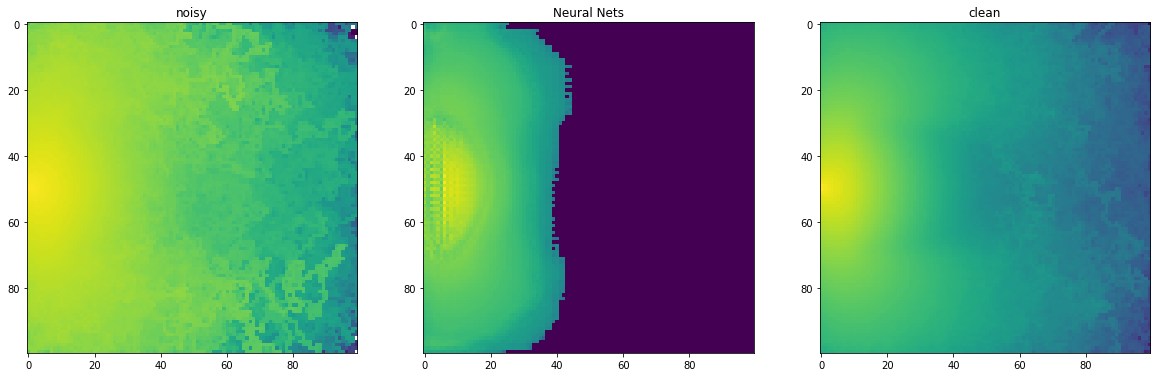

test 2



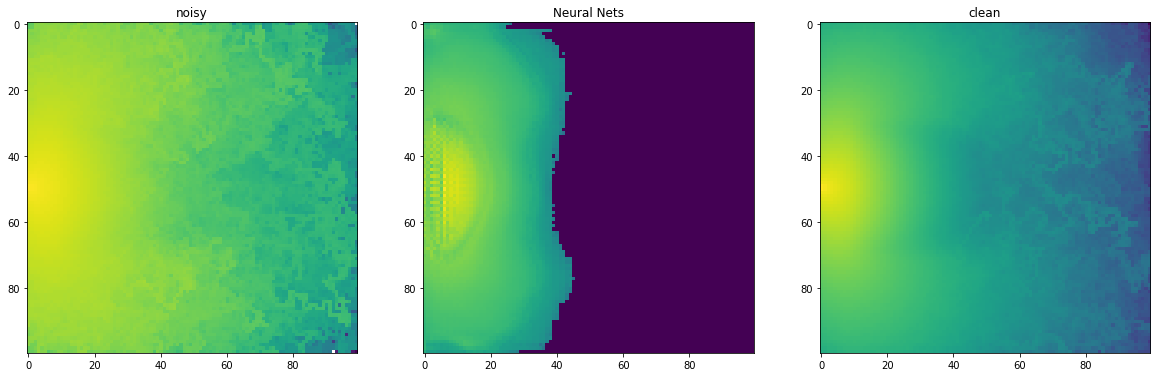

test 3



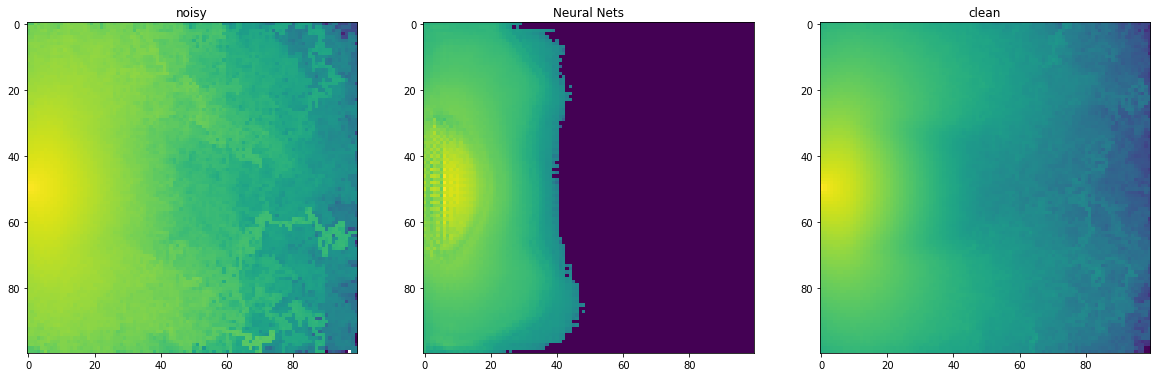

test 4



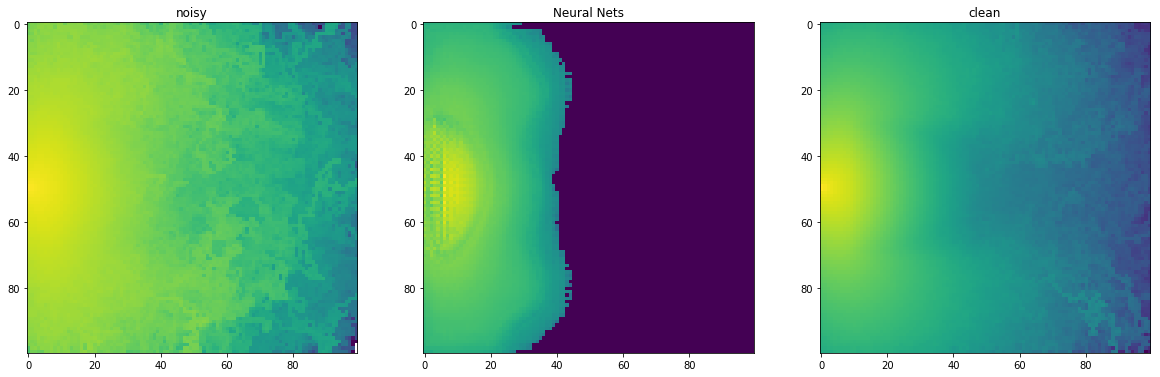

test 5



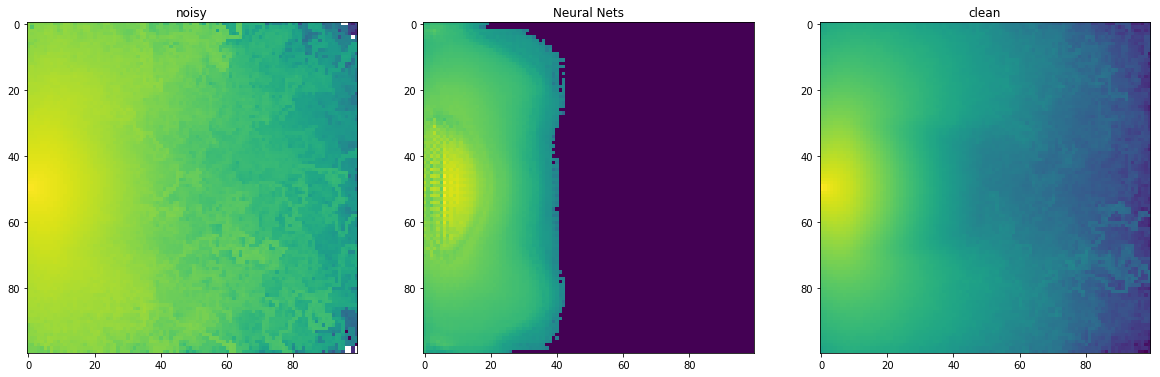

test 6



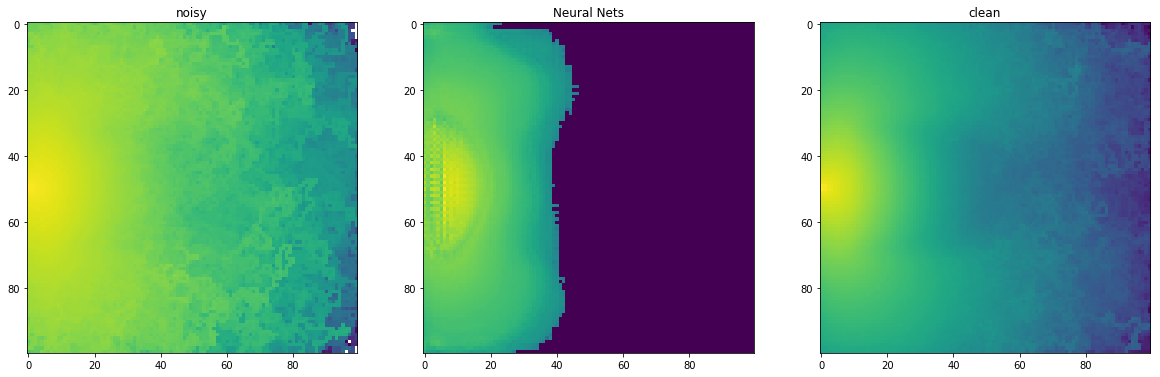

test 7



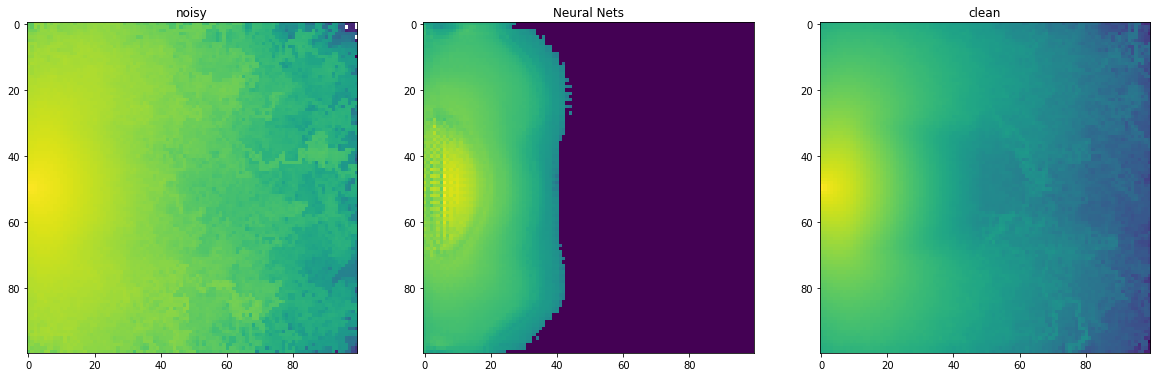

test 8



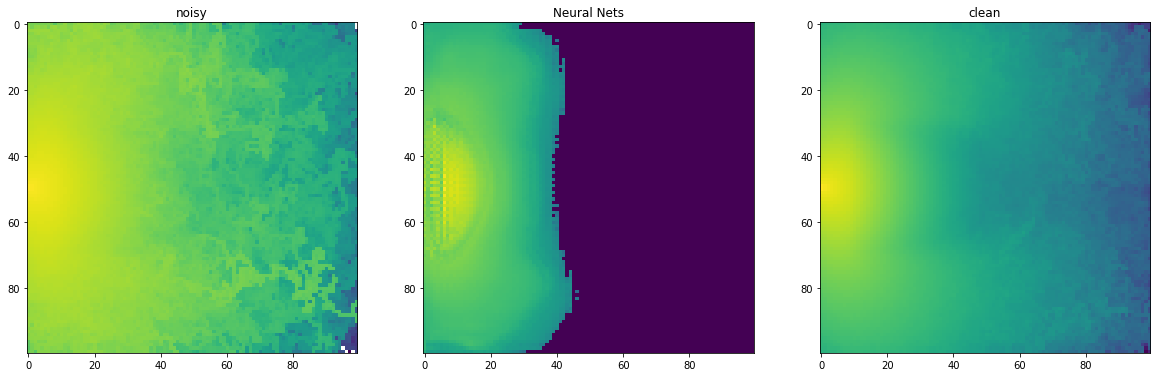

test 9



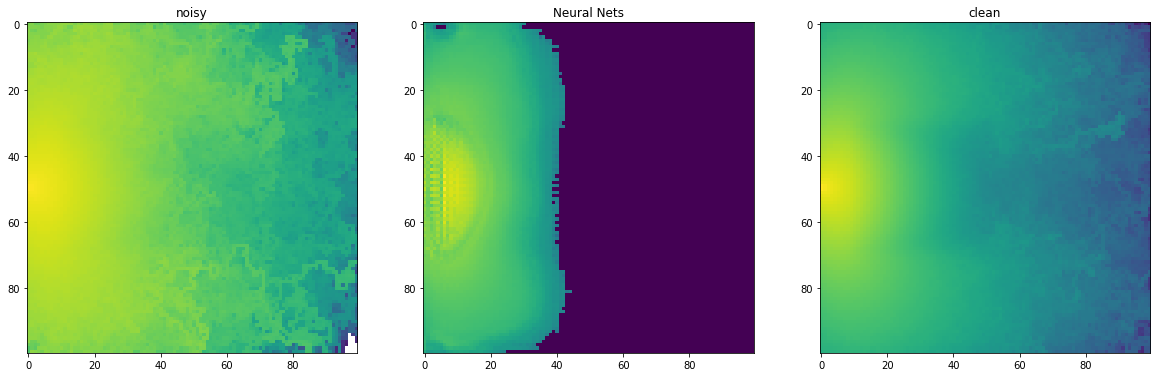

test 10



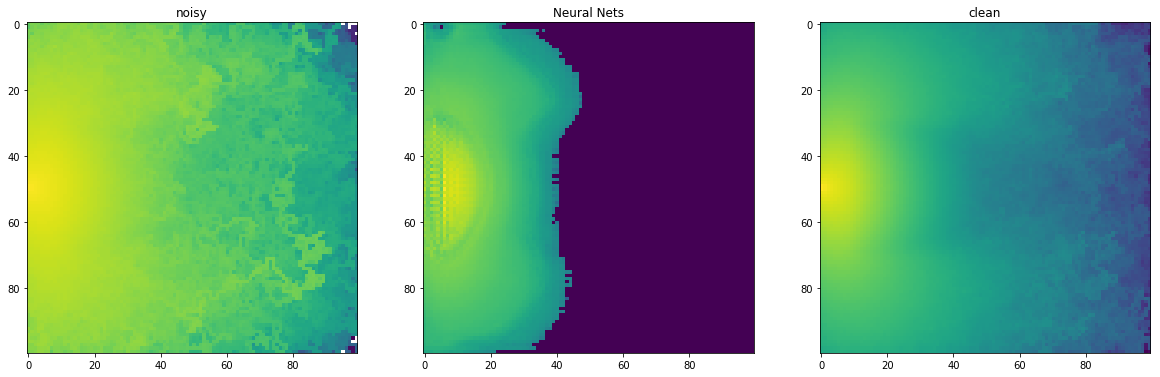

test 11



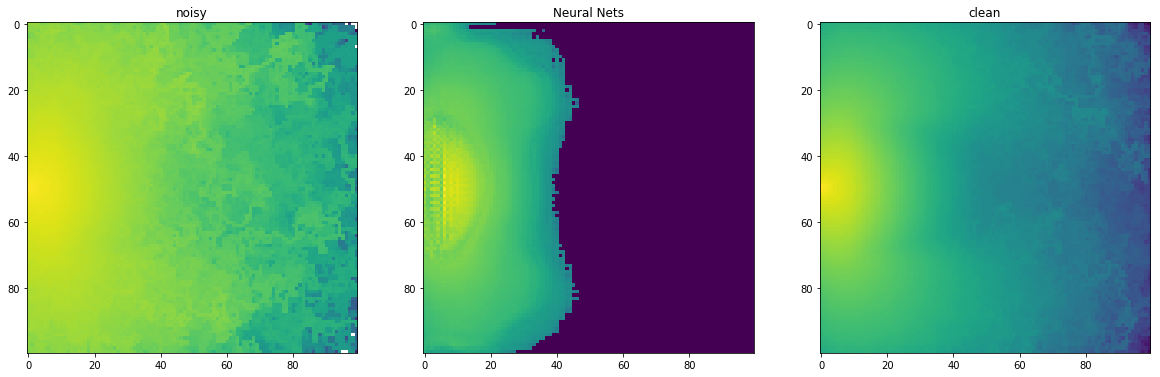

test 12



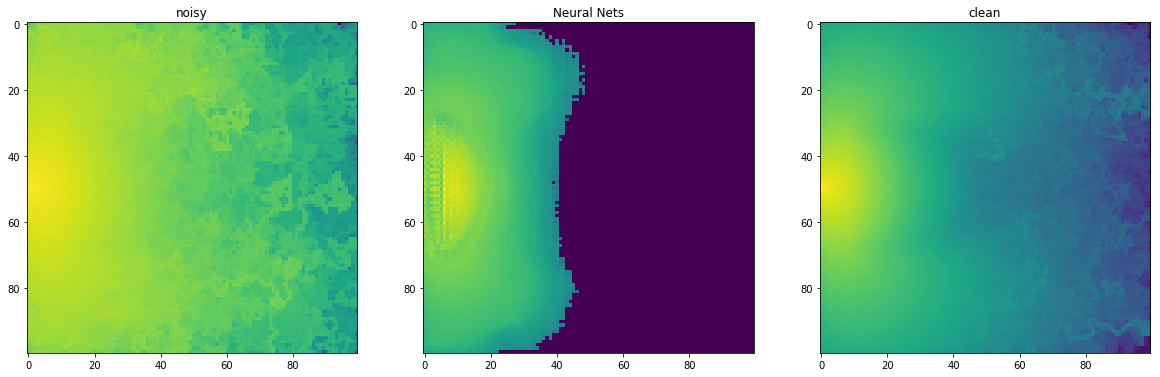

test 13



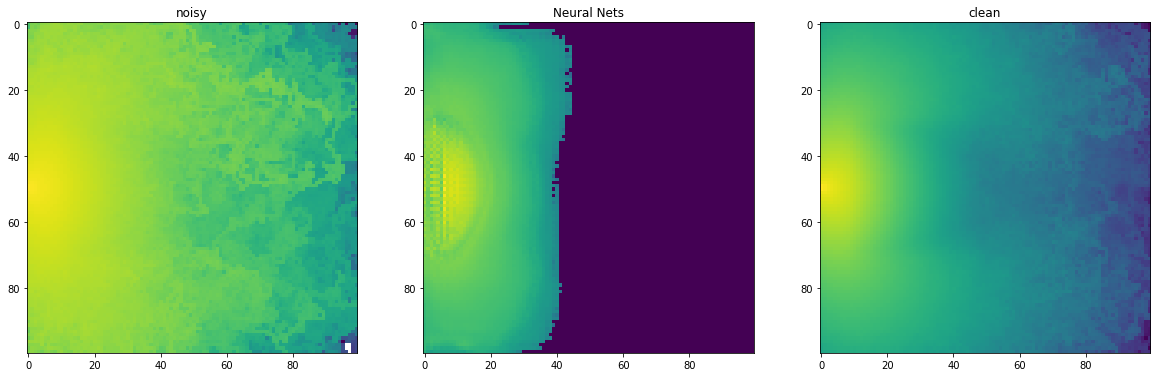

test 14



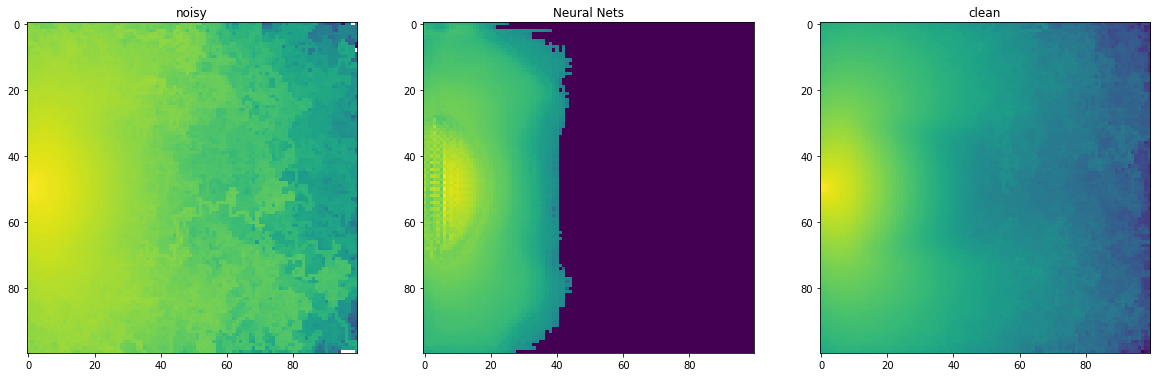

test 15



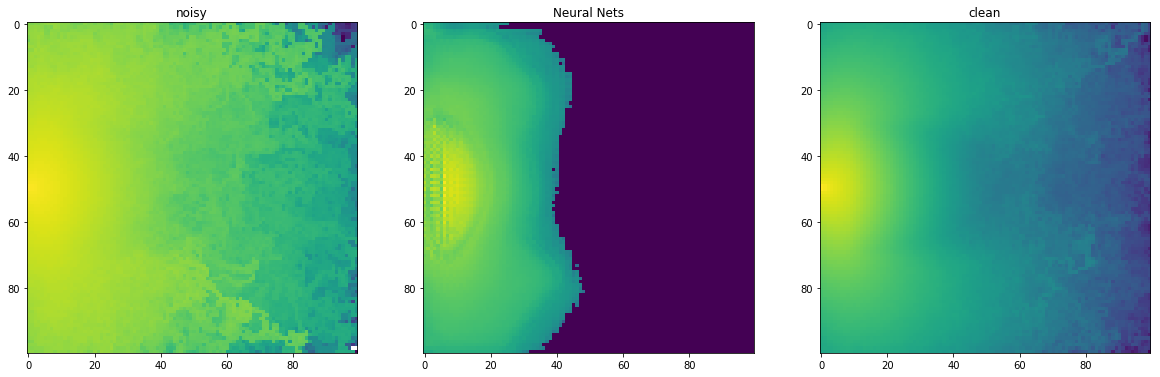

test 16



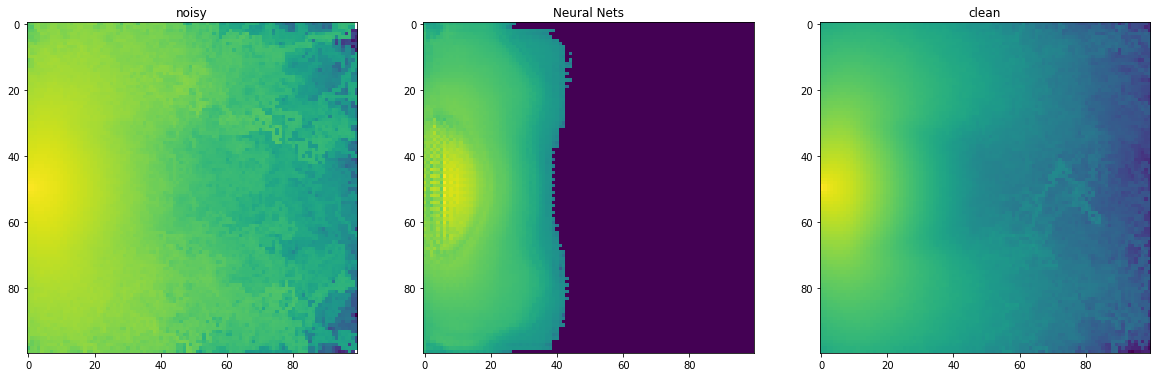

test 17



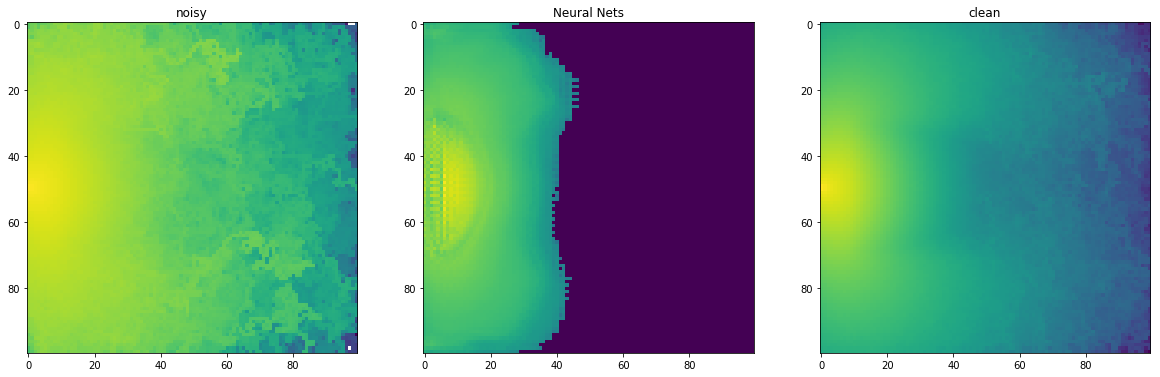

test 18



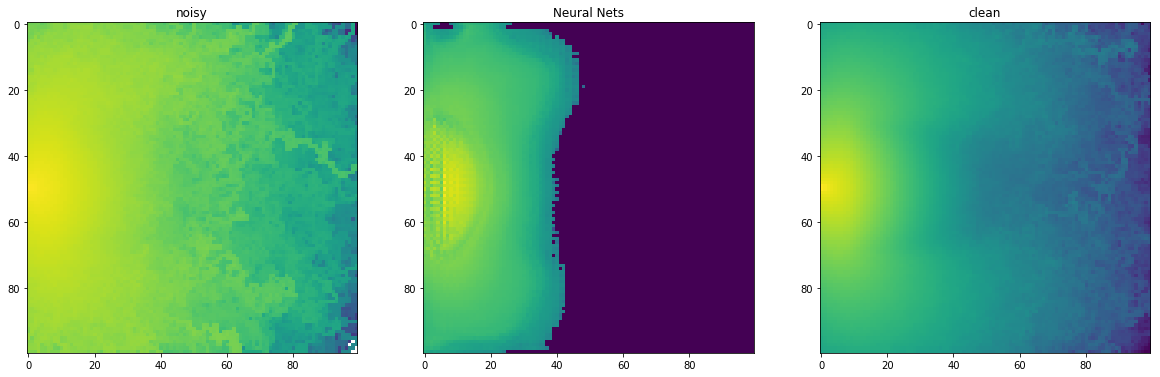

test 19



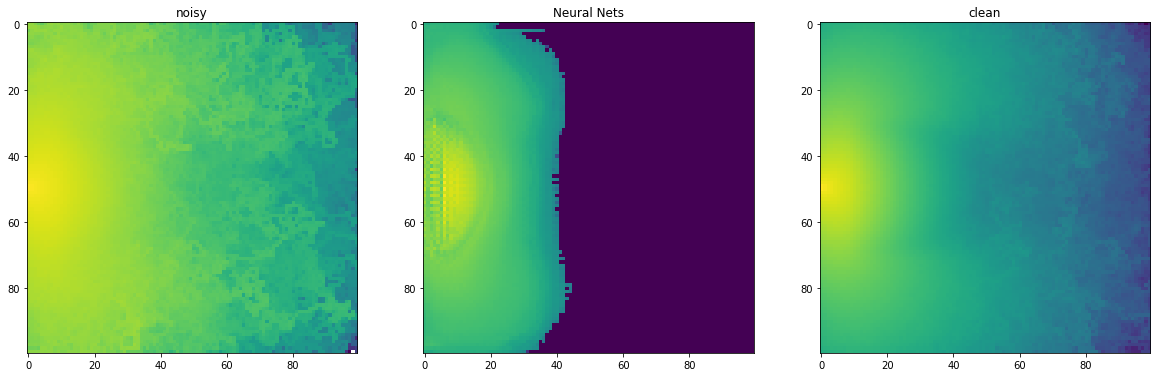

test 20



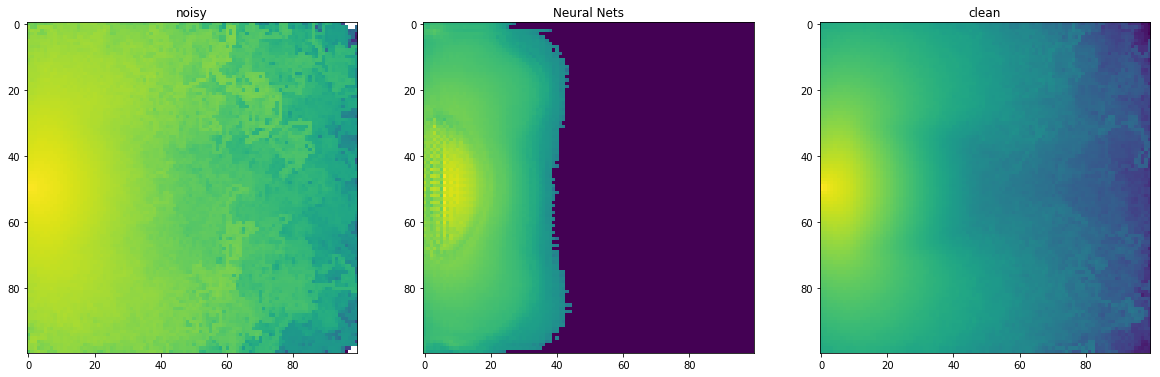

test 21



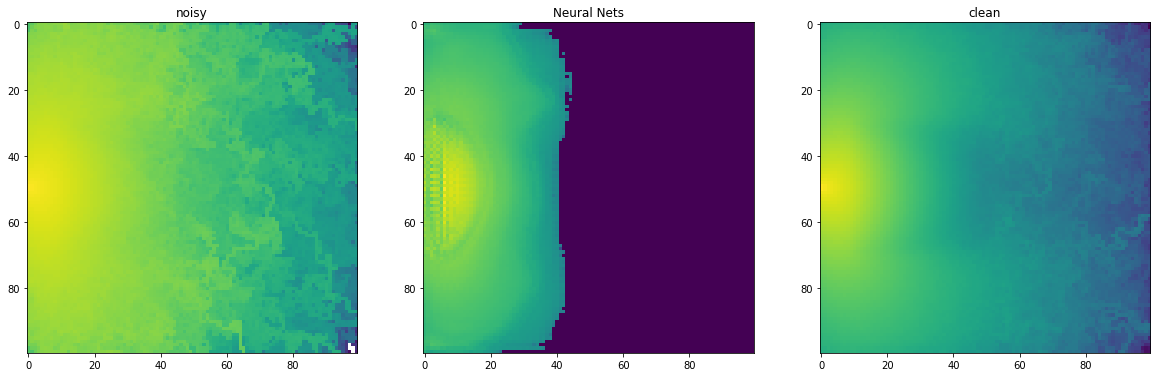

test 22



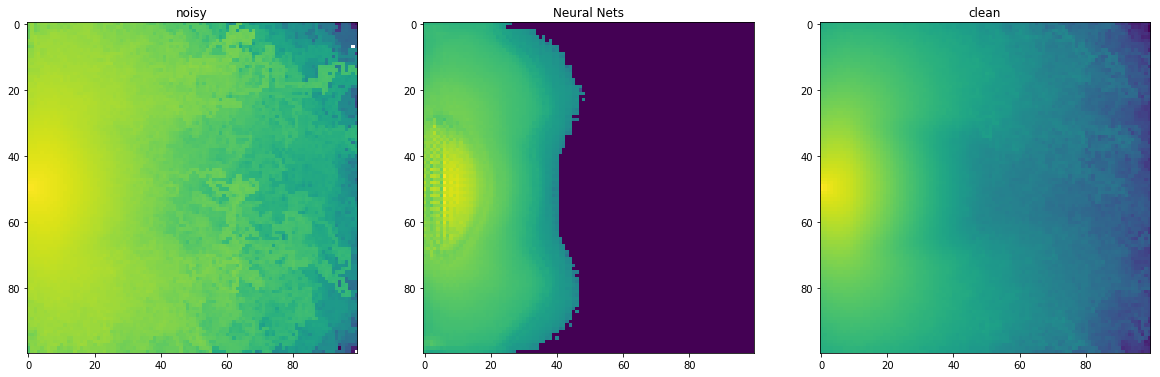

test 23



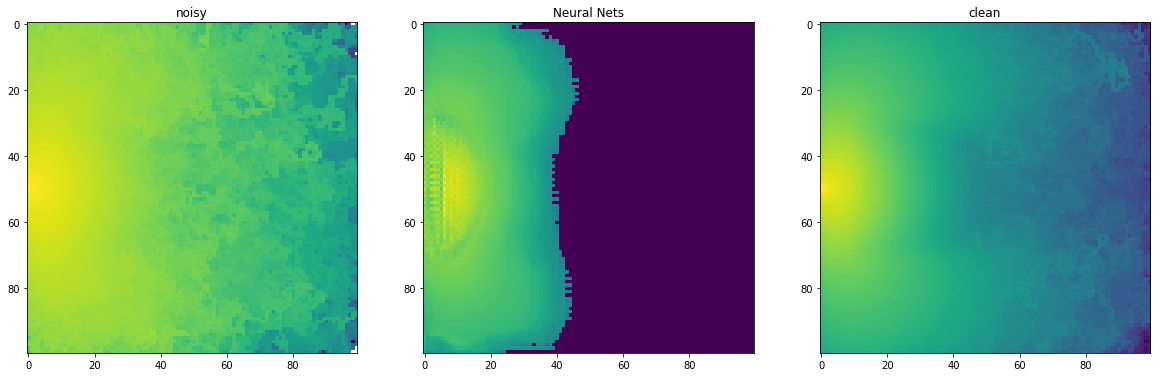

test 24



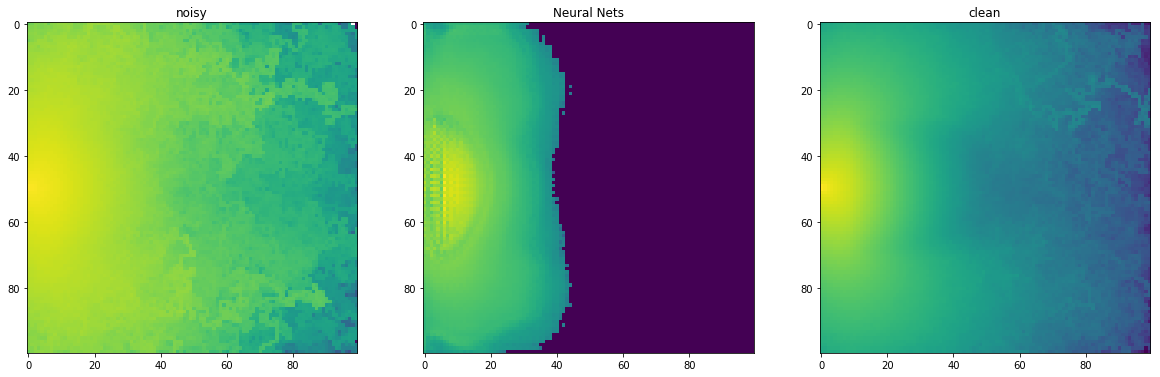

test 25



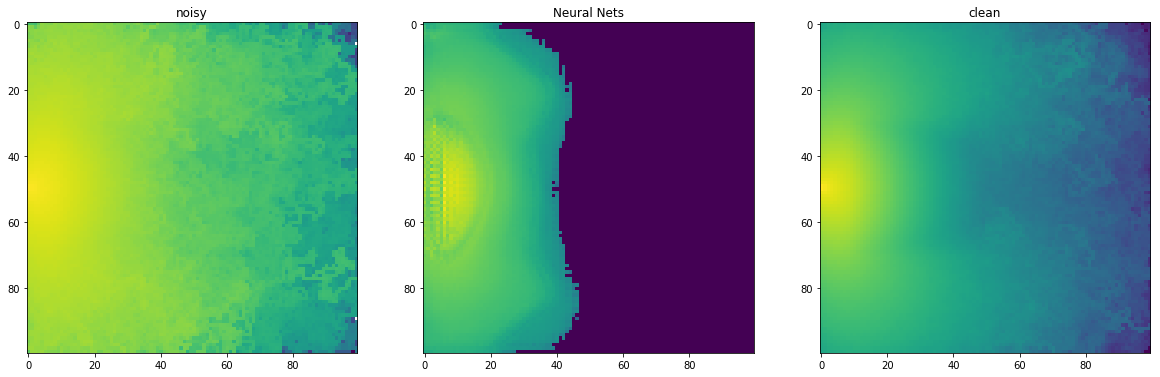

test 26



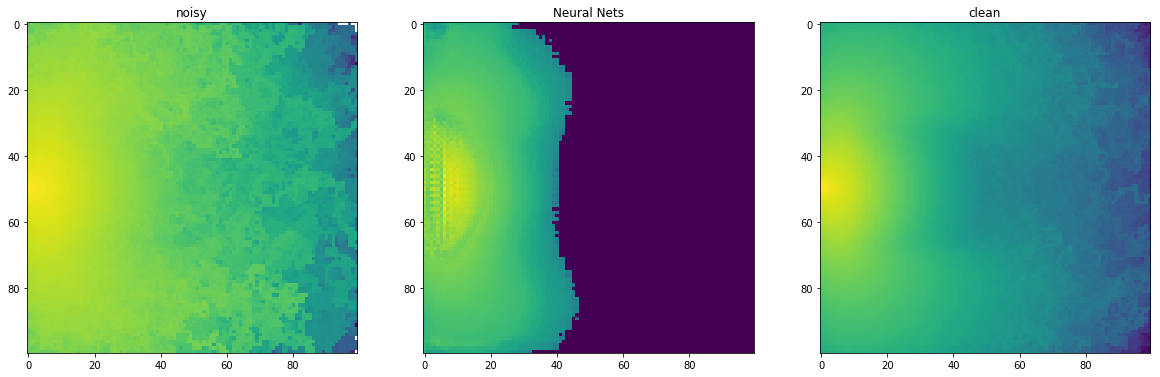

test 27



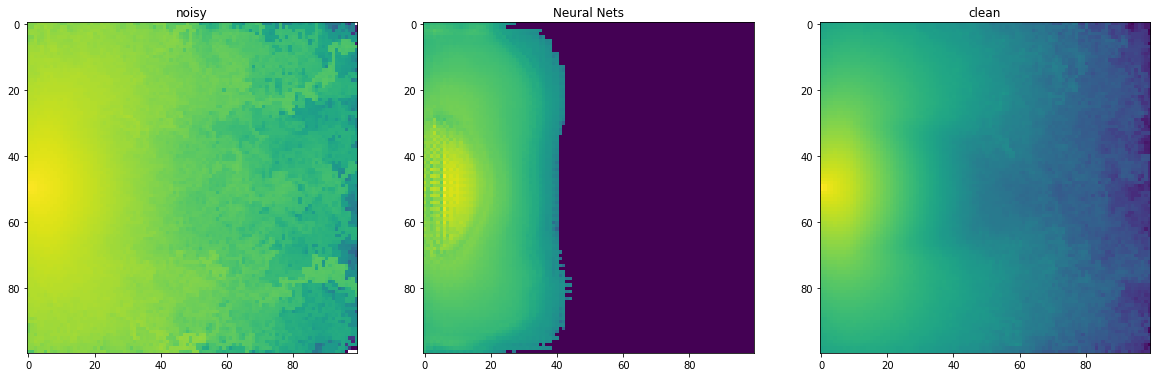

test 28



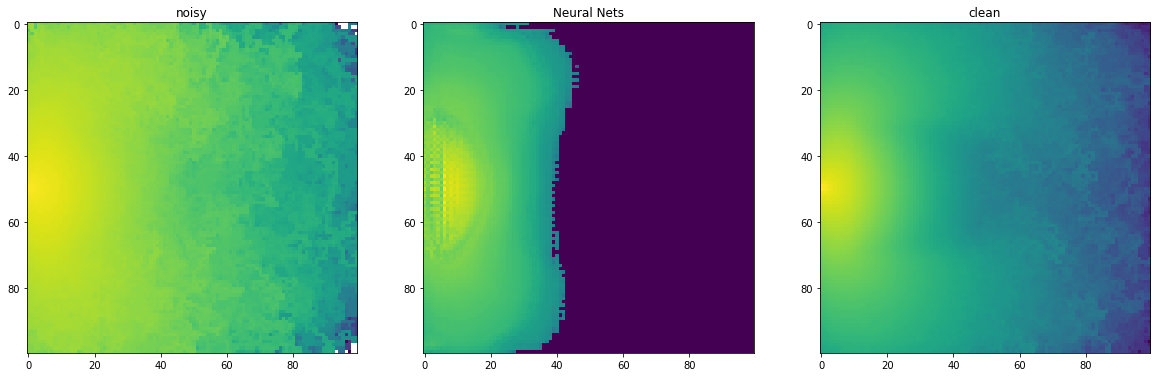

test 29



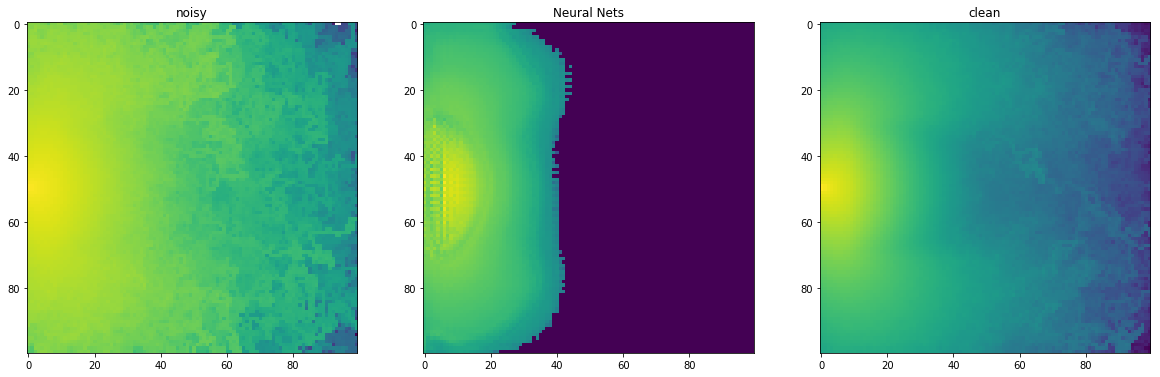

test 30



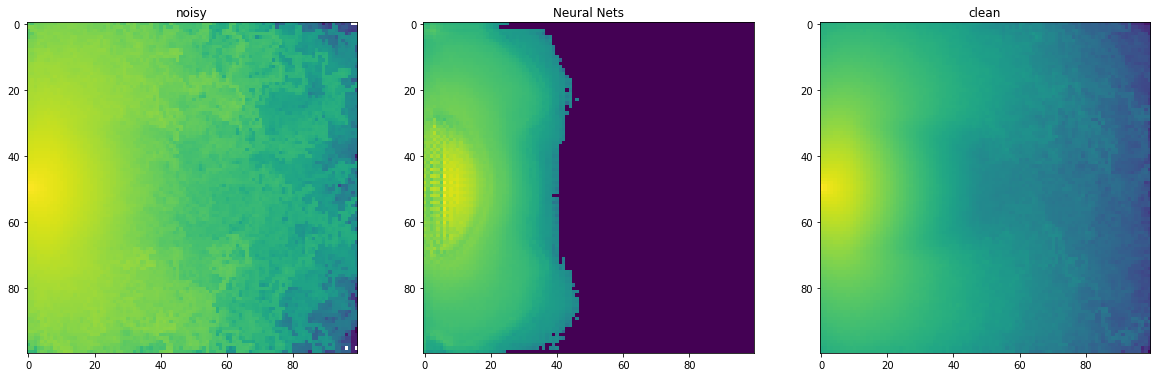

test 31



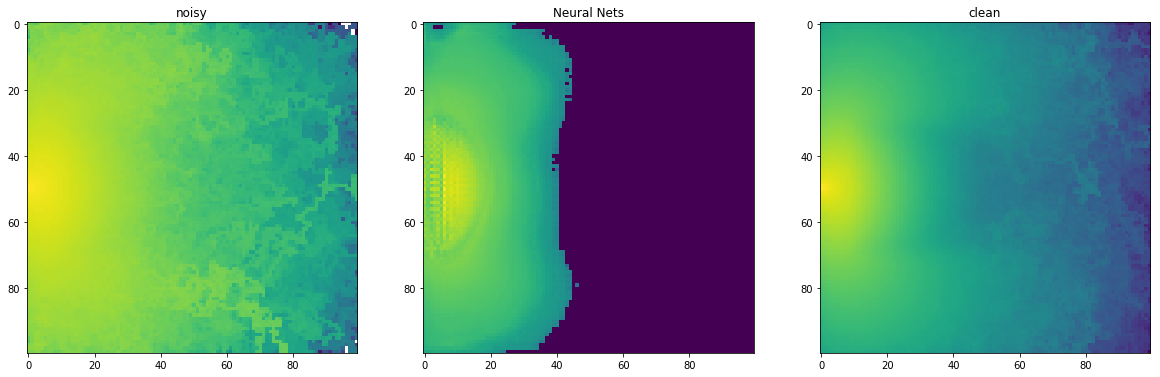

test 32



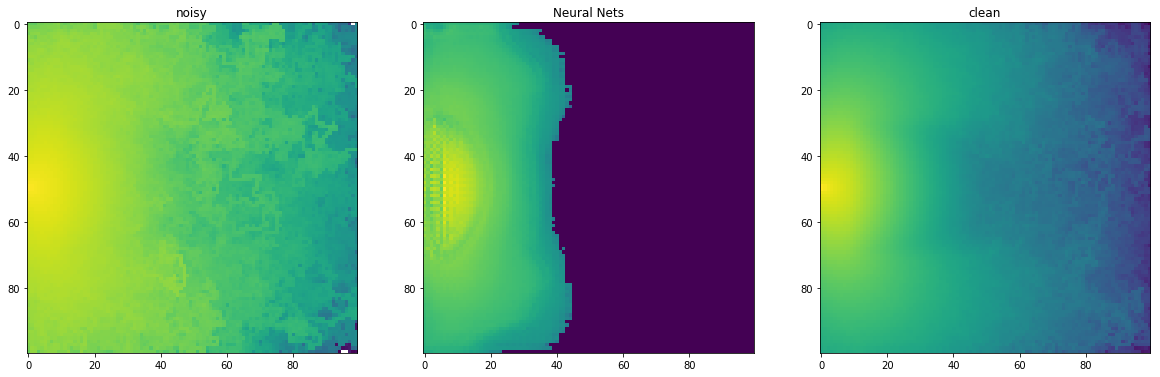

test 33



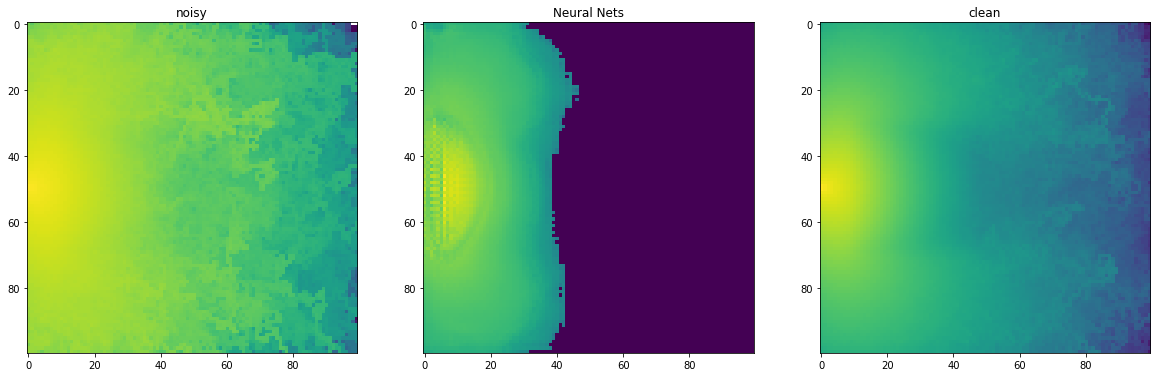

test 34



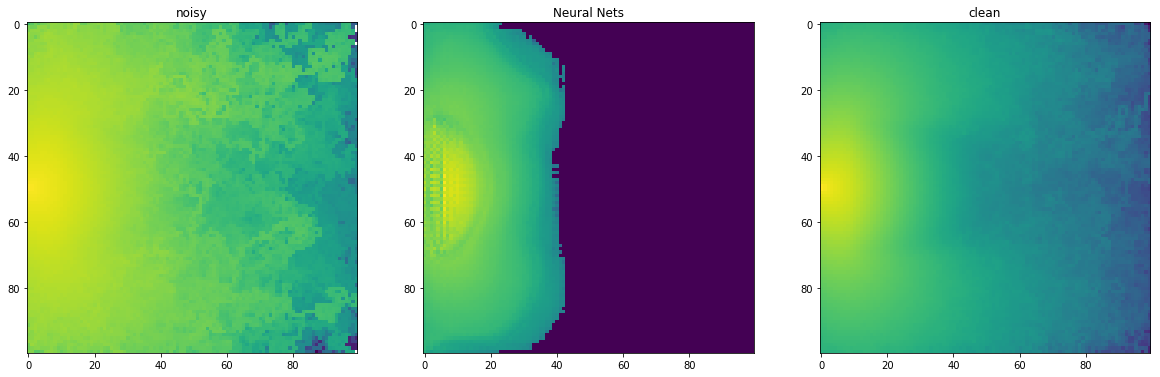

test 35



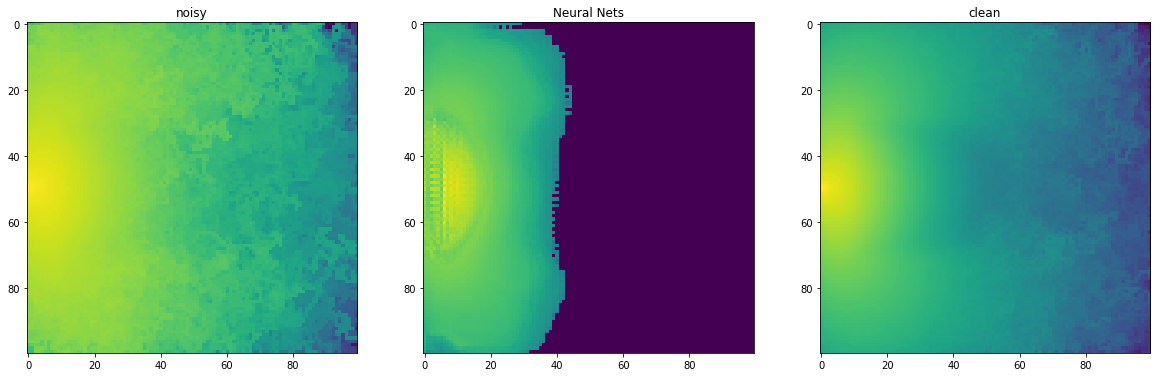

test 36



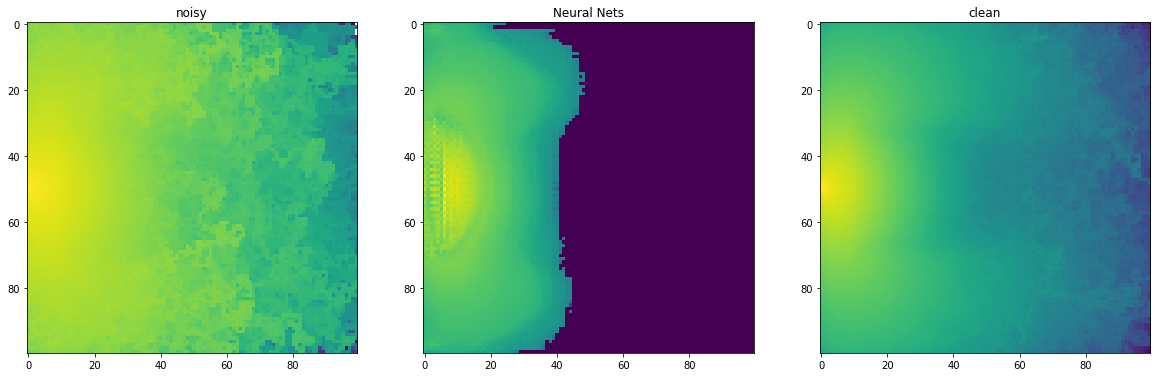

test 37



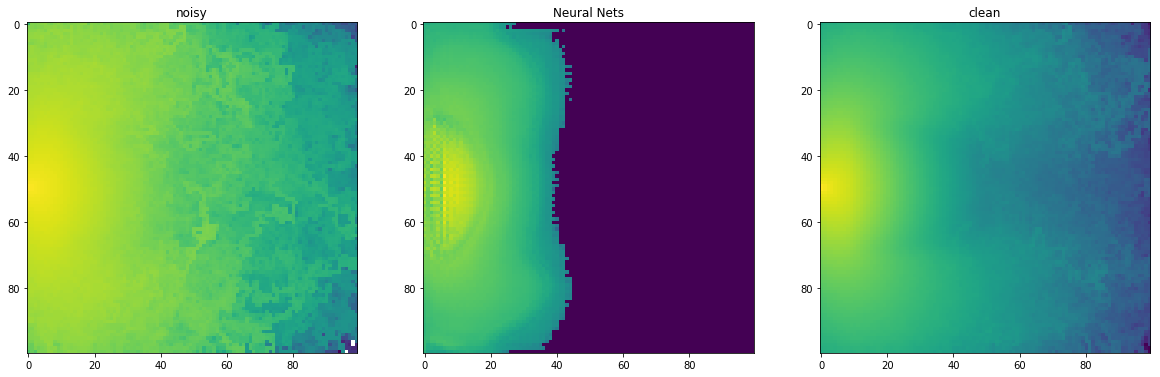

test 38



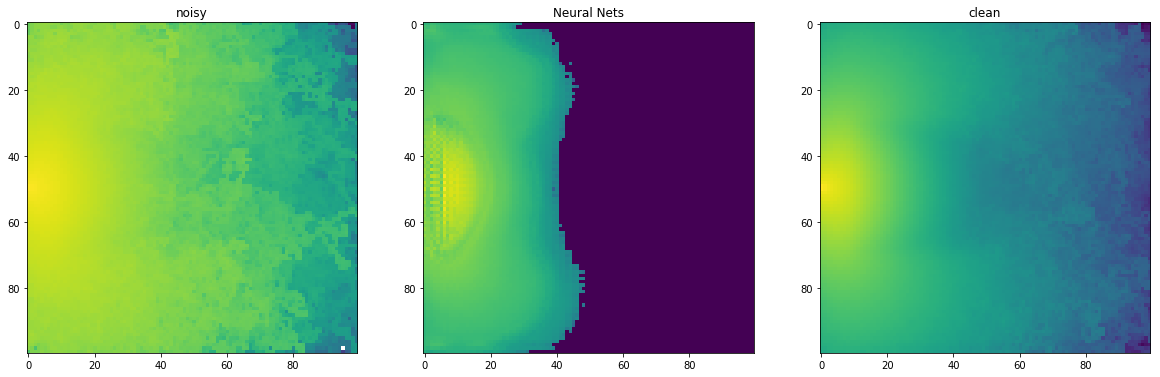

test 39



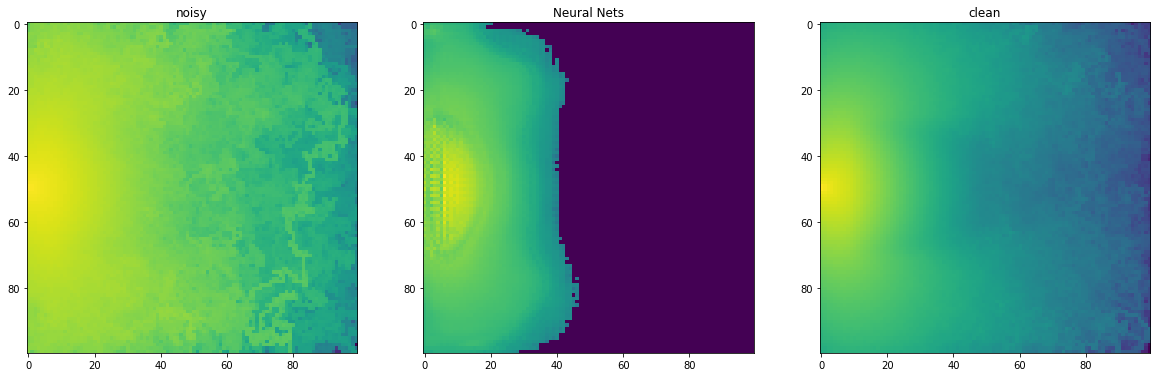

test 40



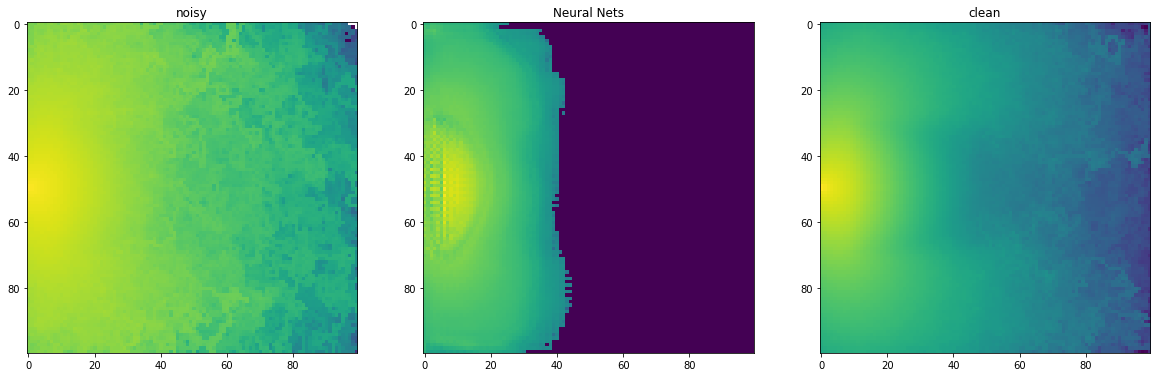

test 41



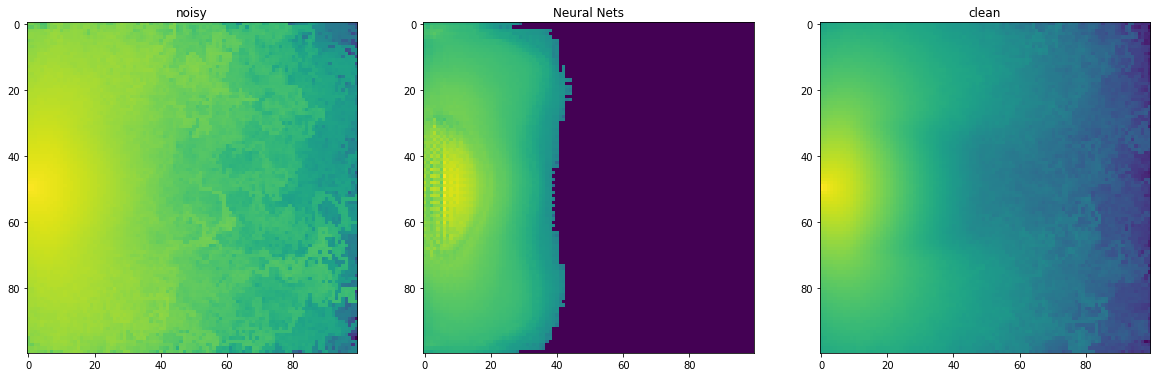

test 42



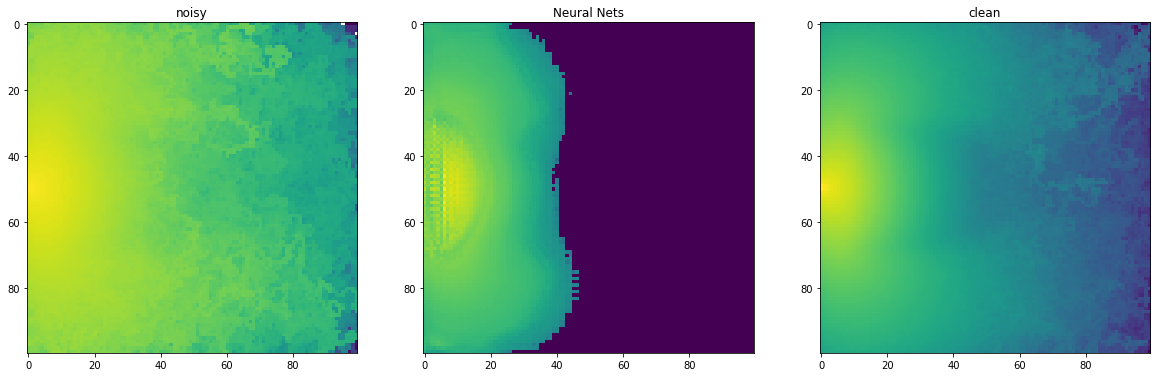

test 43



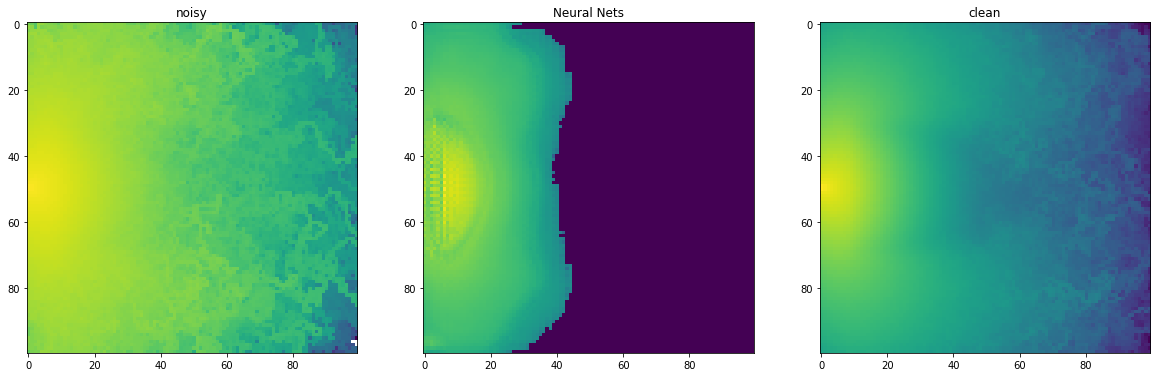

test 44



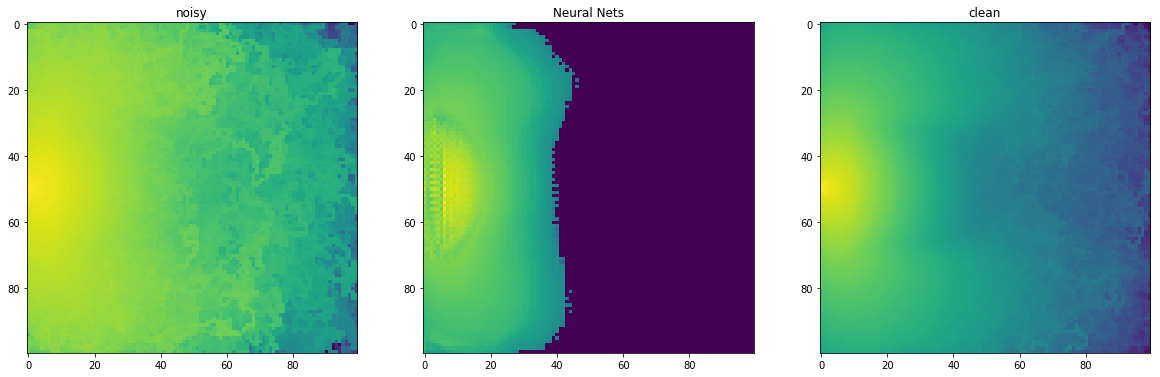

test 45



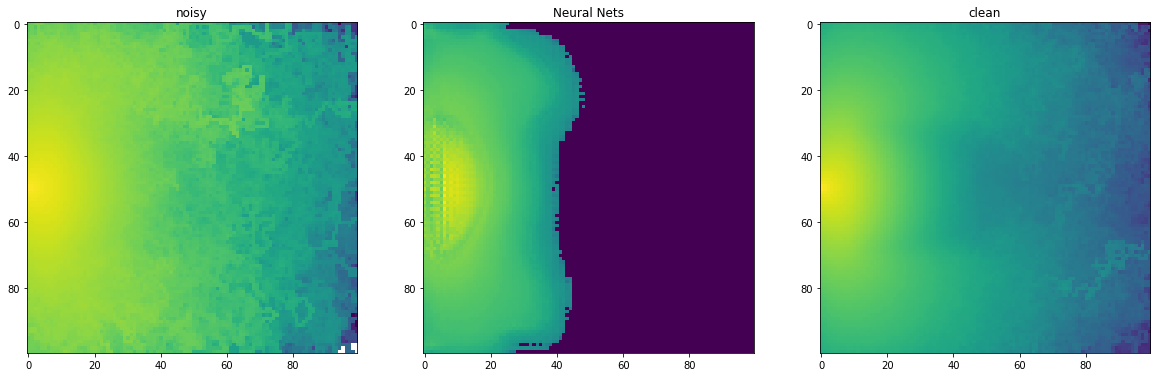

test 46



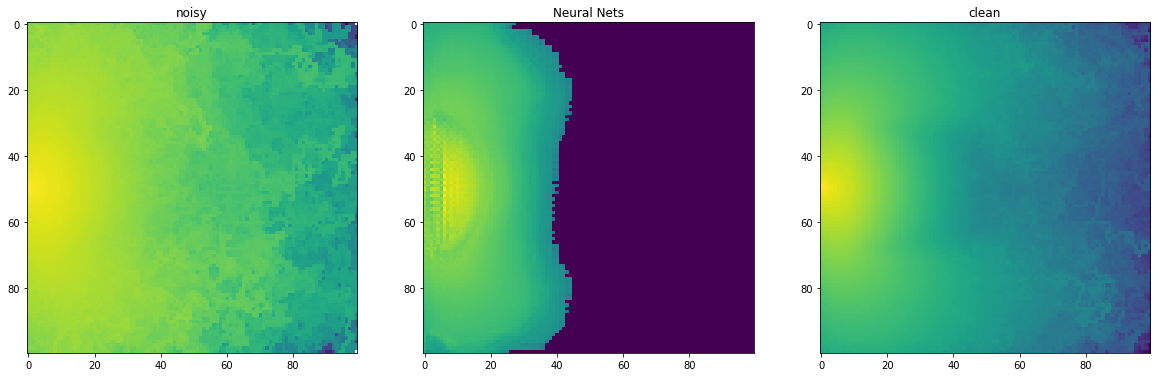

test 47



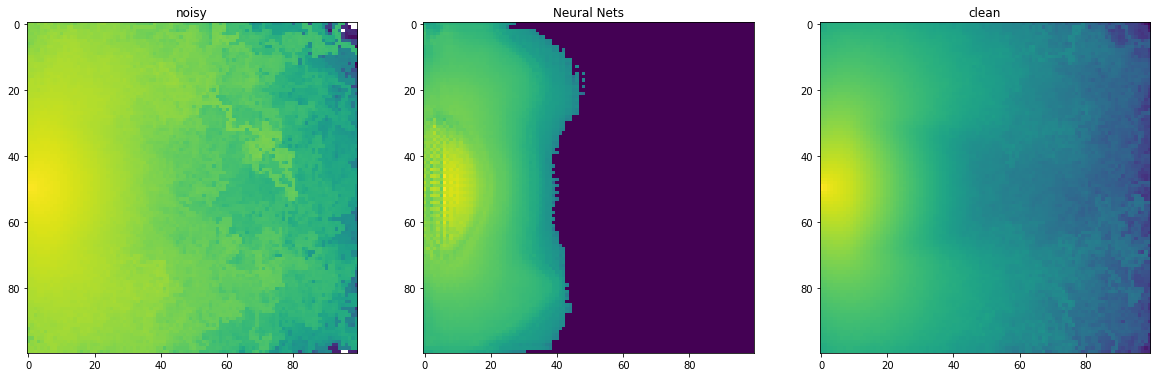

test 48



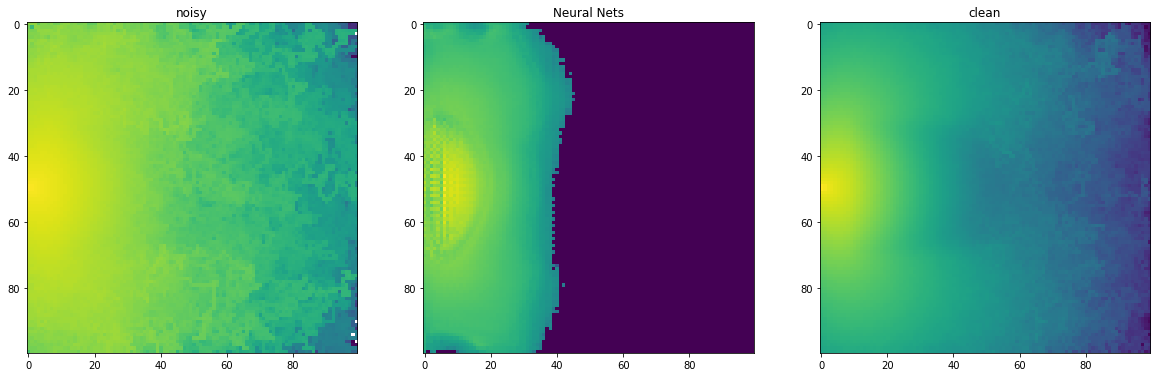

test 49



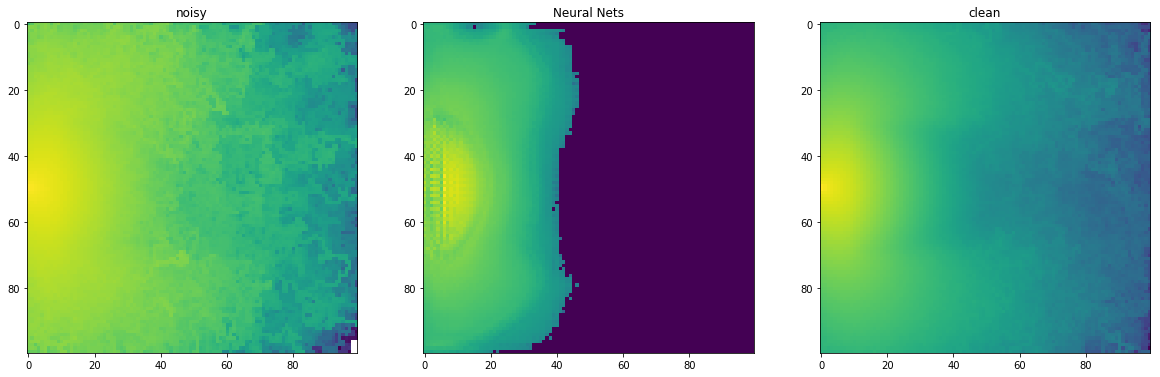

test 50



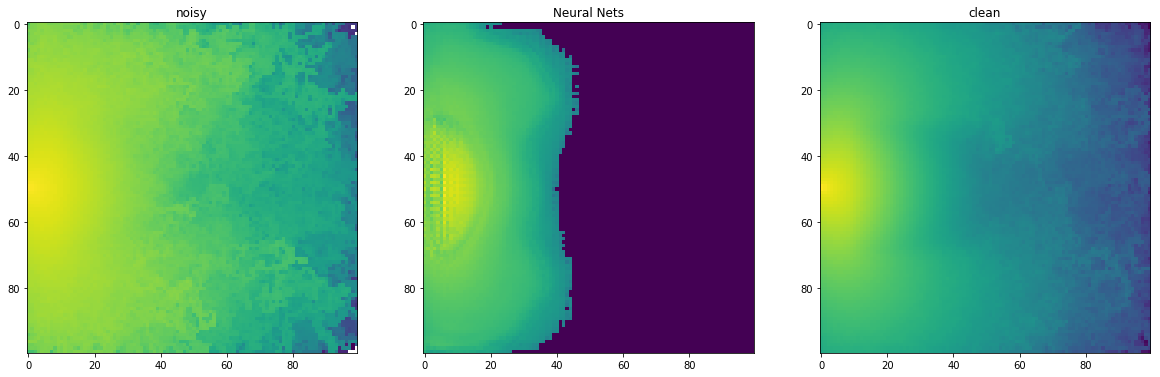

test 51



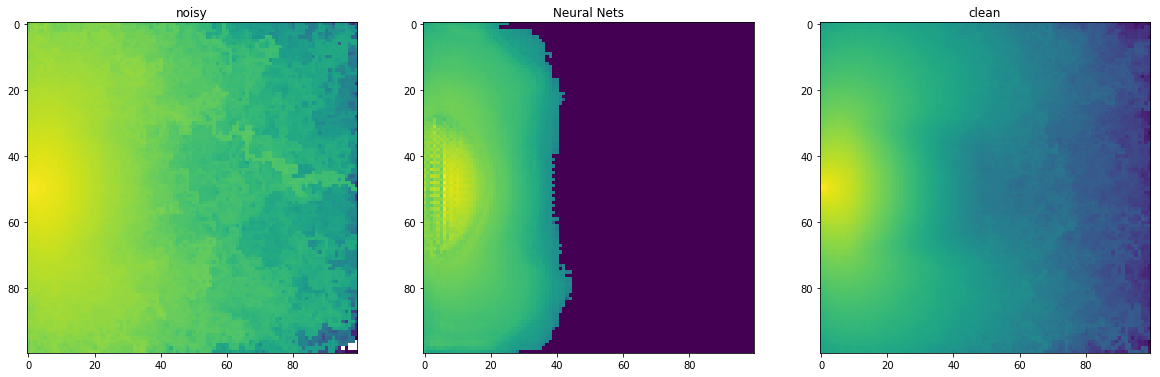

test 52



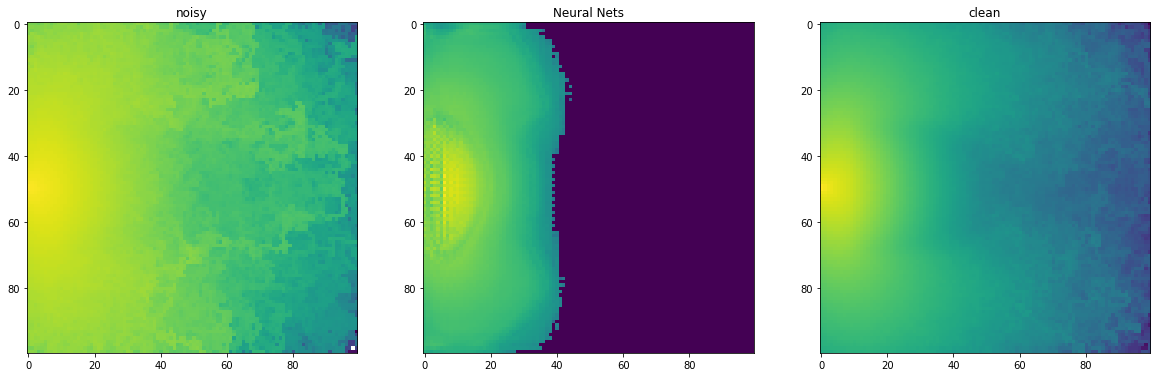

test 53



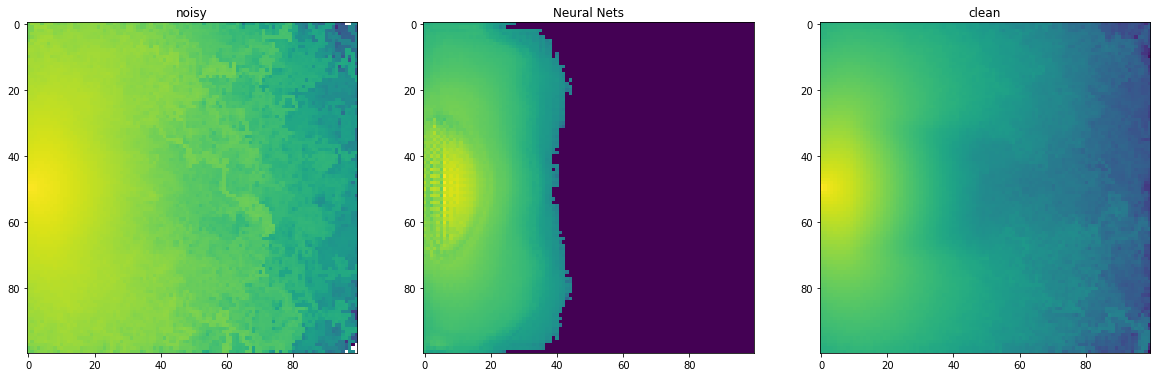

test 54



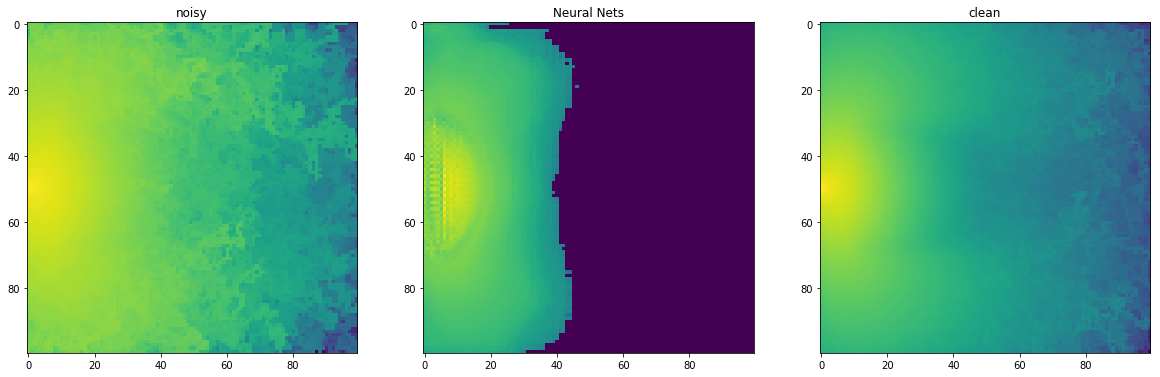

test 55



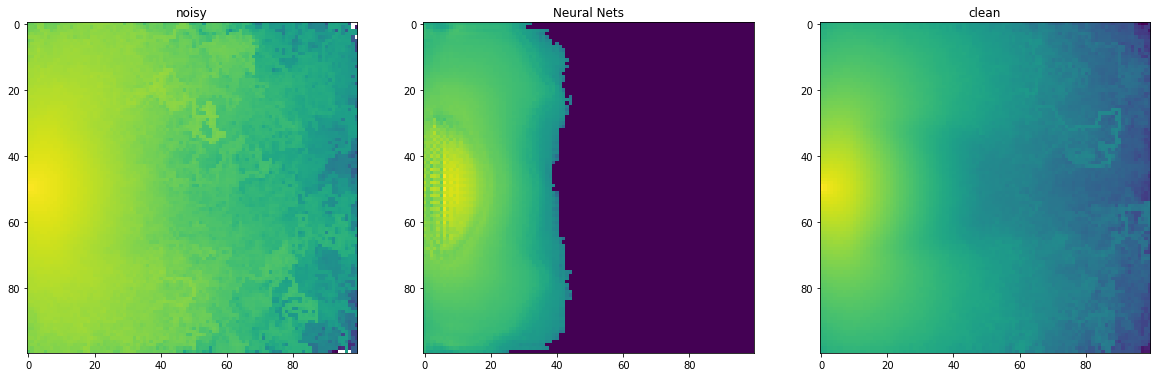

test 56



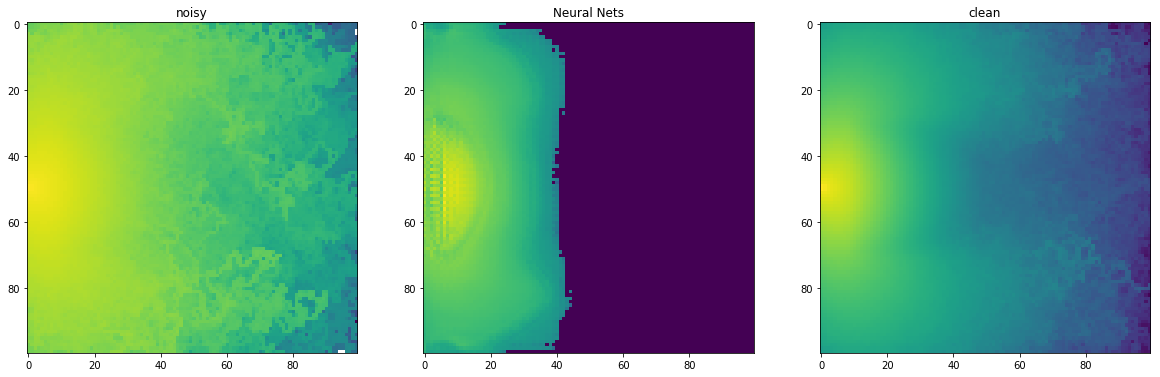

test 57



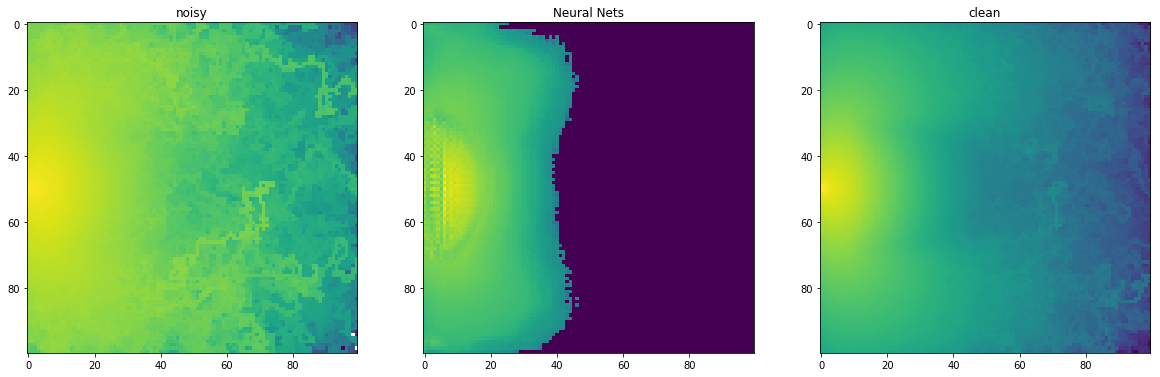

test 58



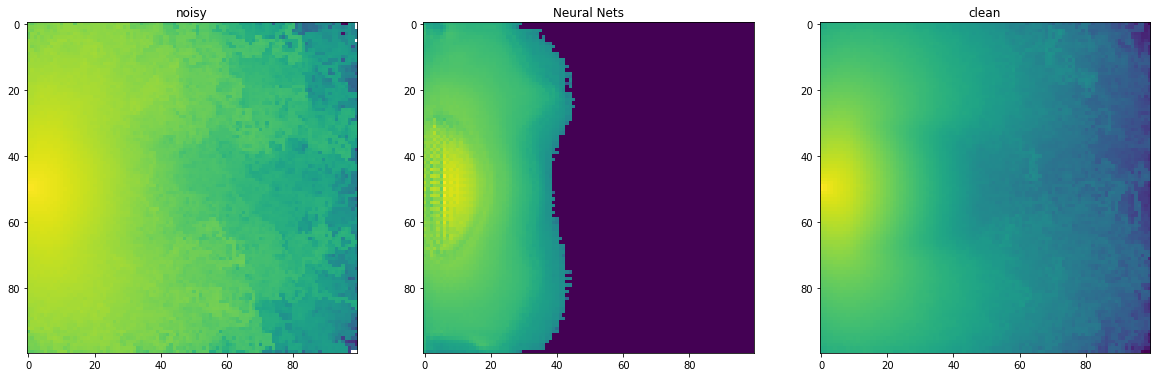

test 59



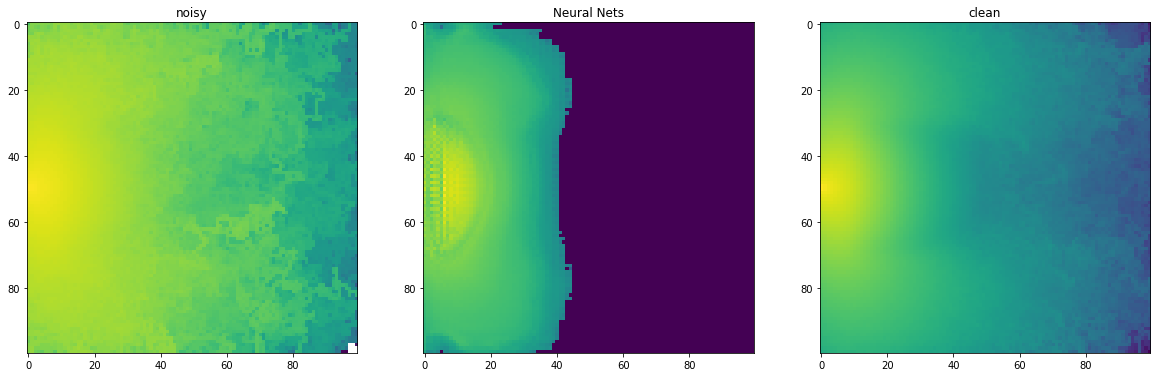

test 60



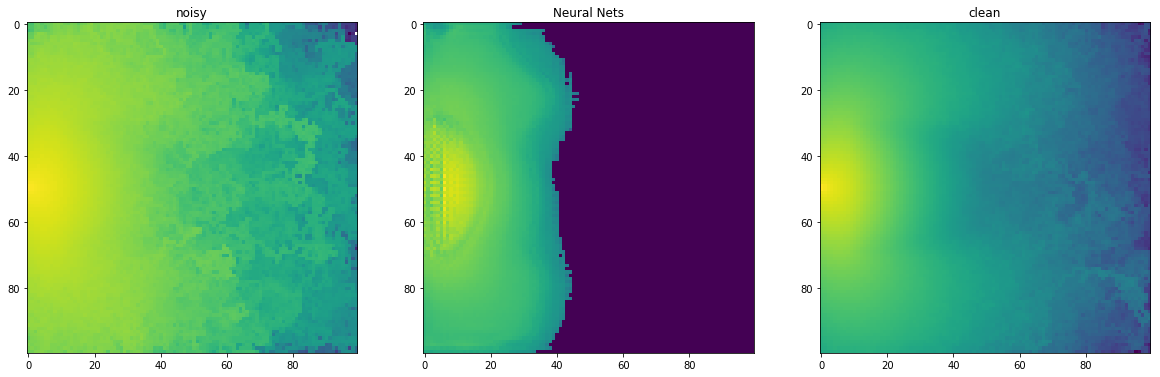

test 61



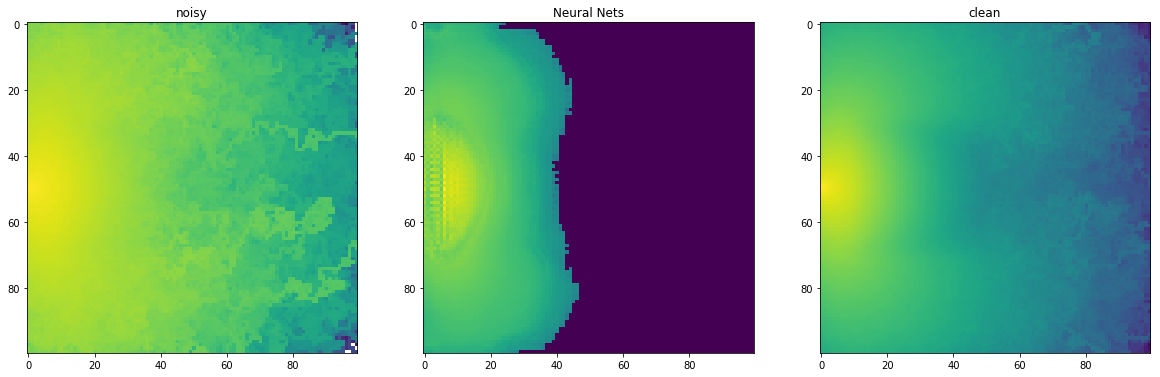

test 62



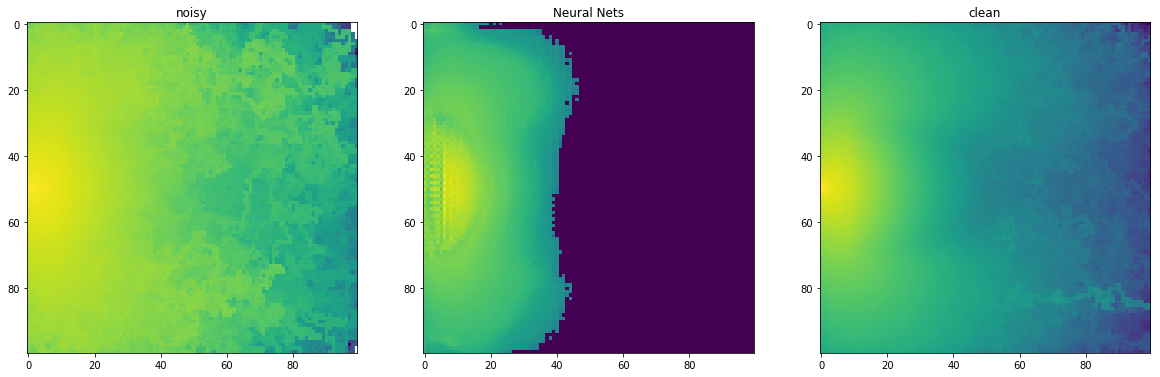

test 63



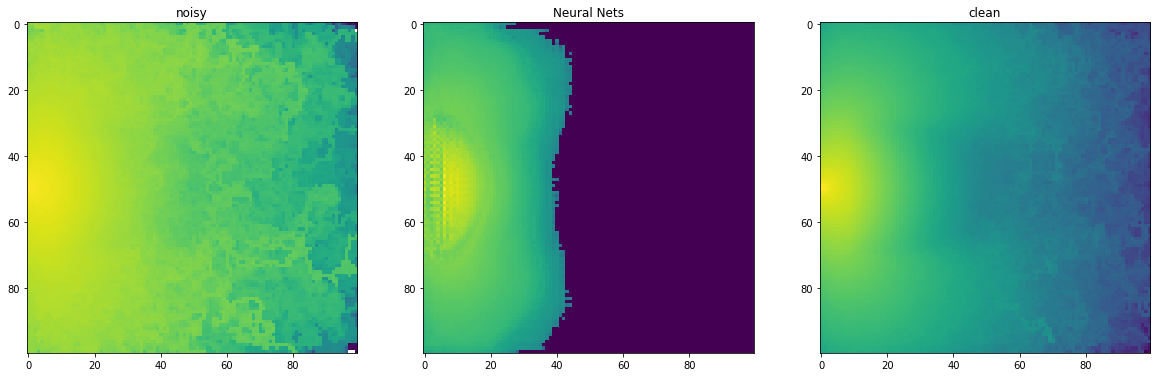

test 64



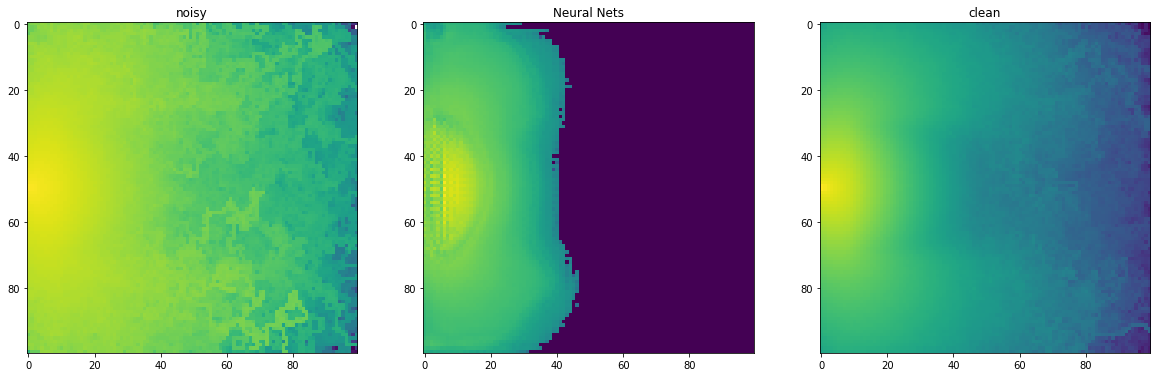

test 65



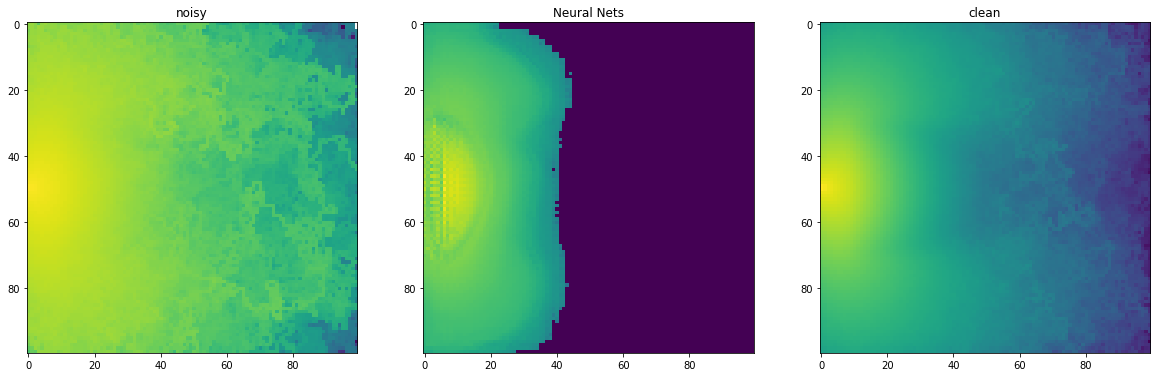

test 66



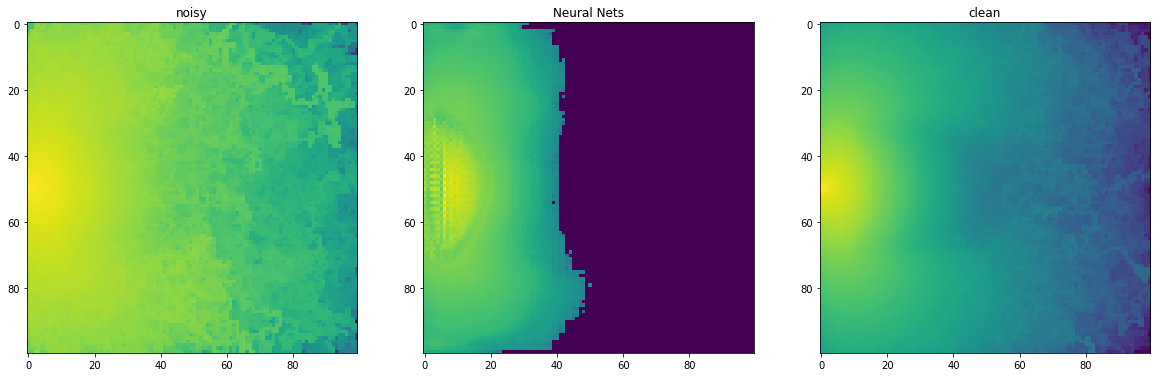

test 67



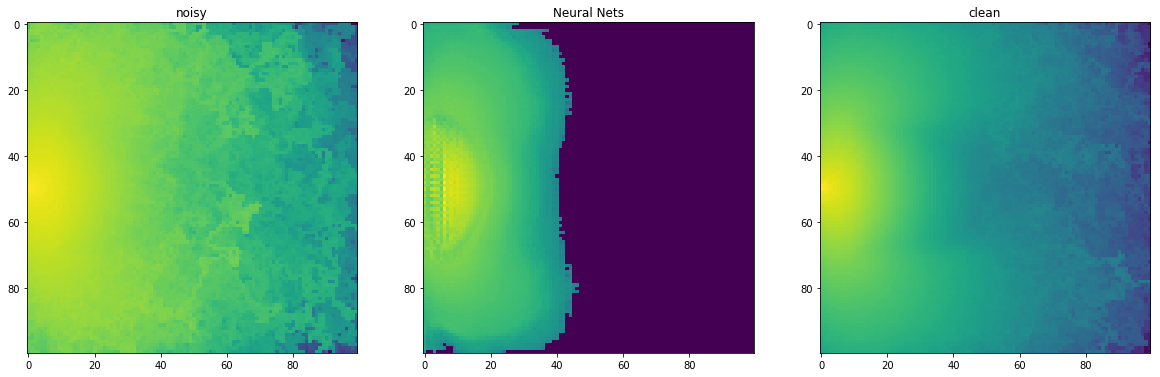

test 68



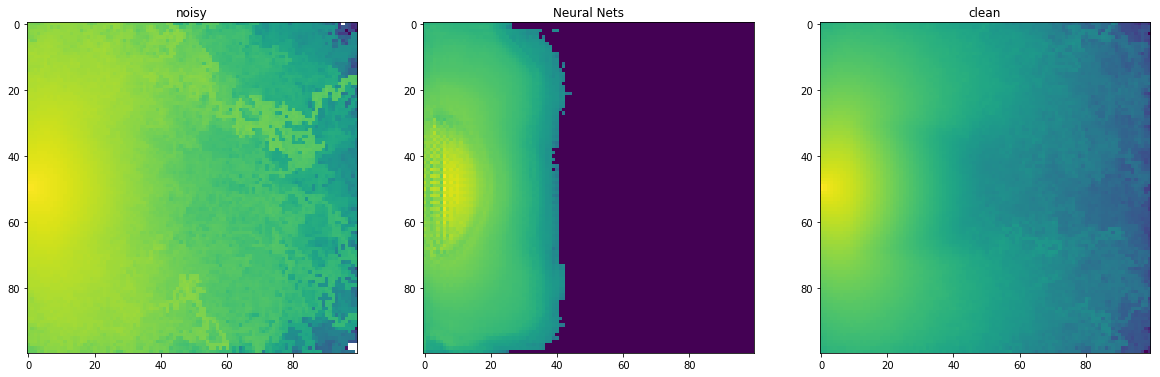

test 69



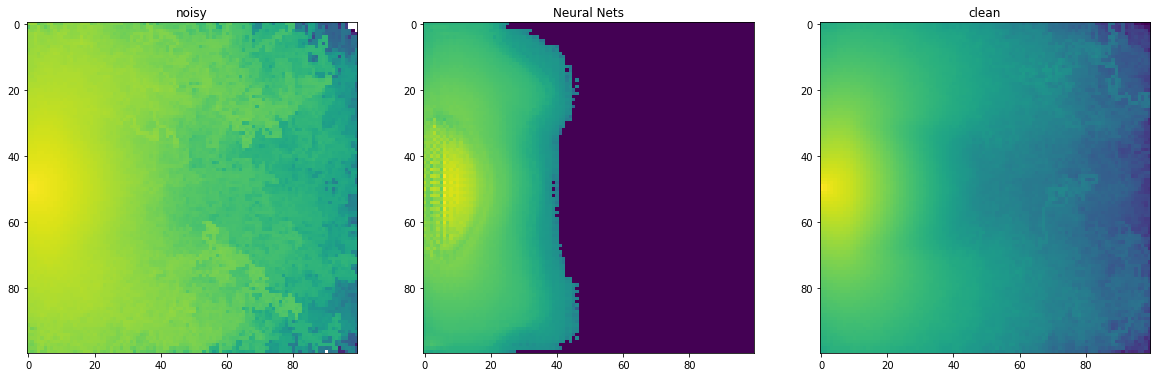

test 70



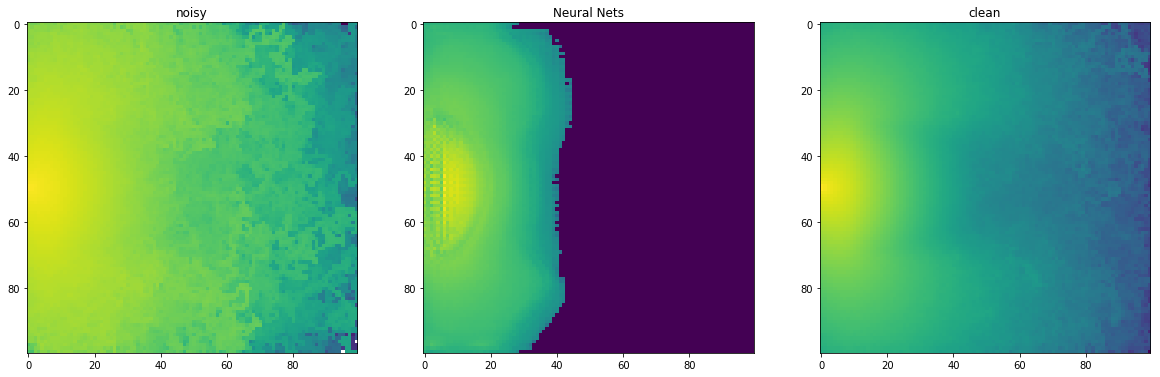

test 71



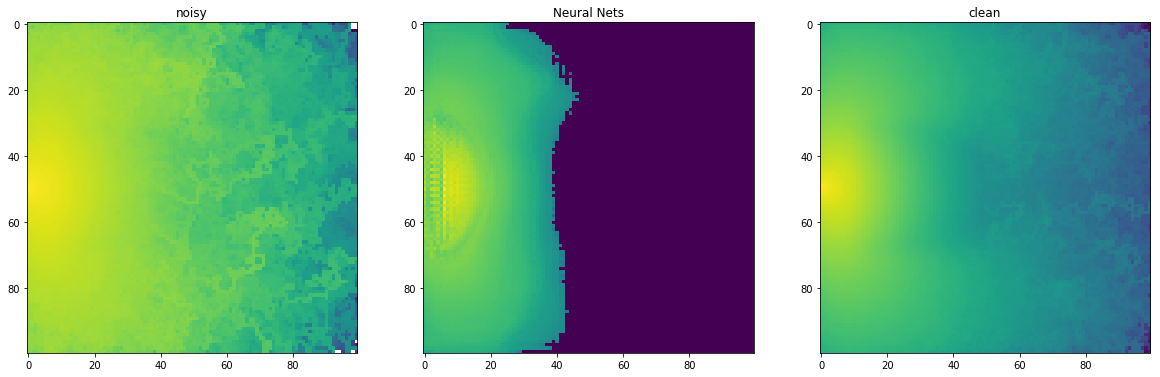

test 72



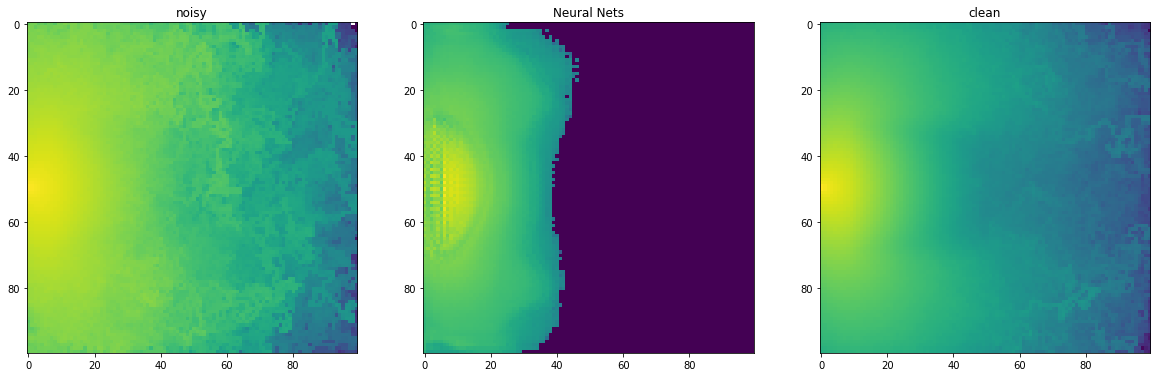

test 73



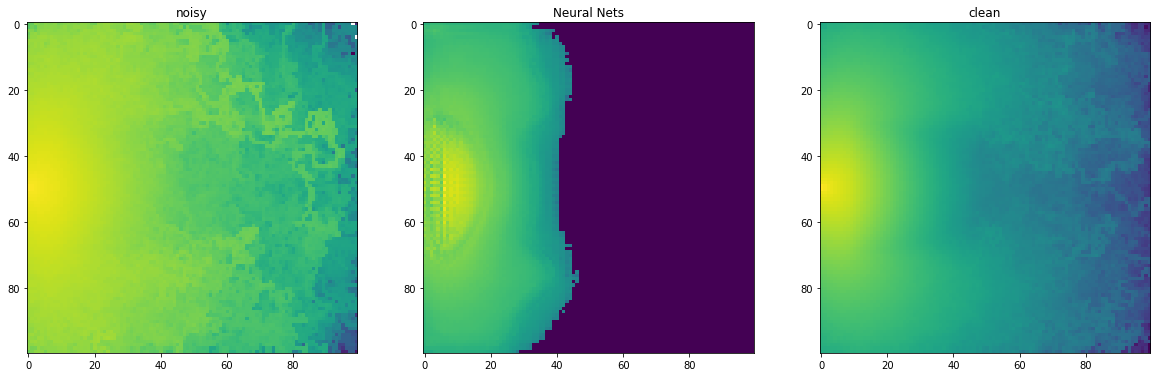

test 74



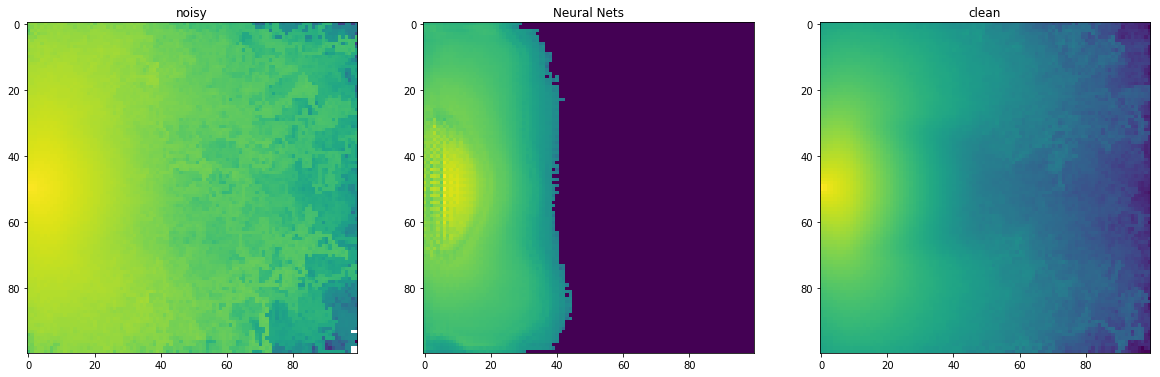

test 75



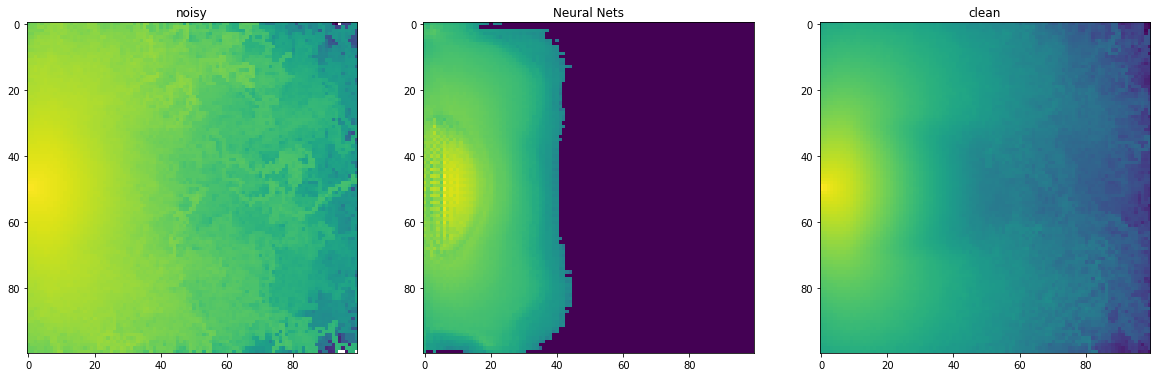

test 76



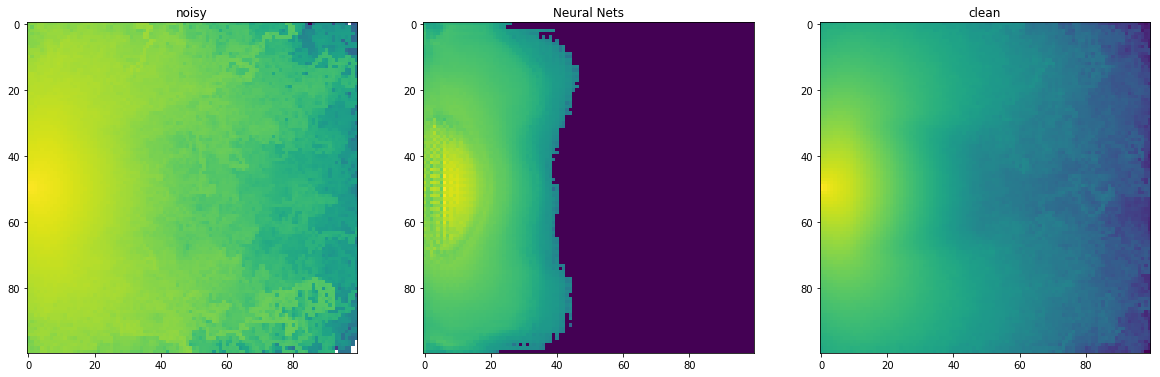

test 77



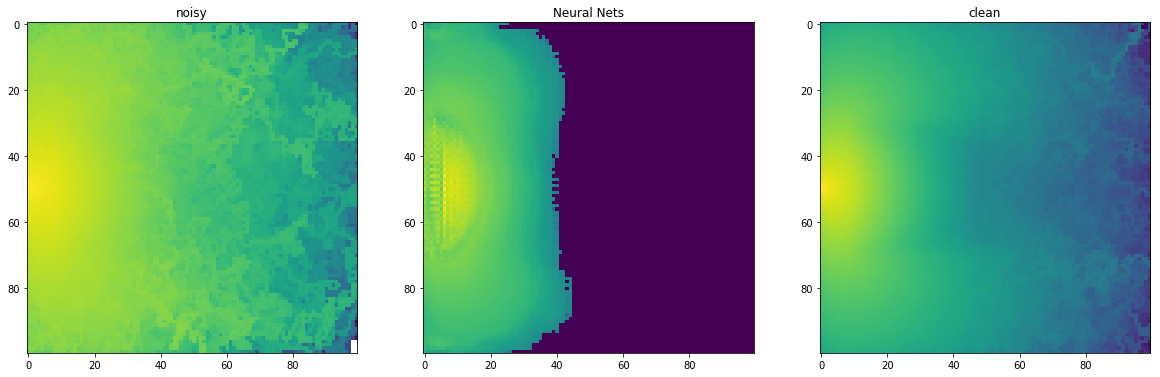

test 78



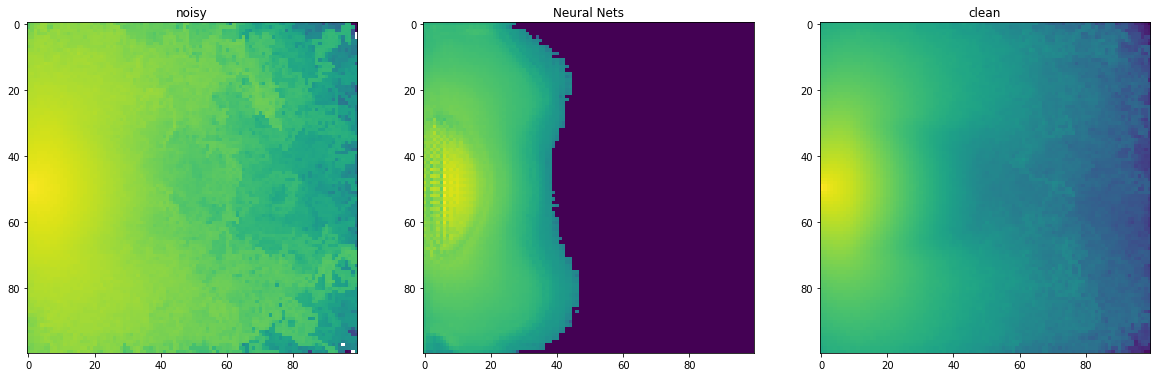

test 79



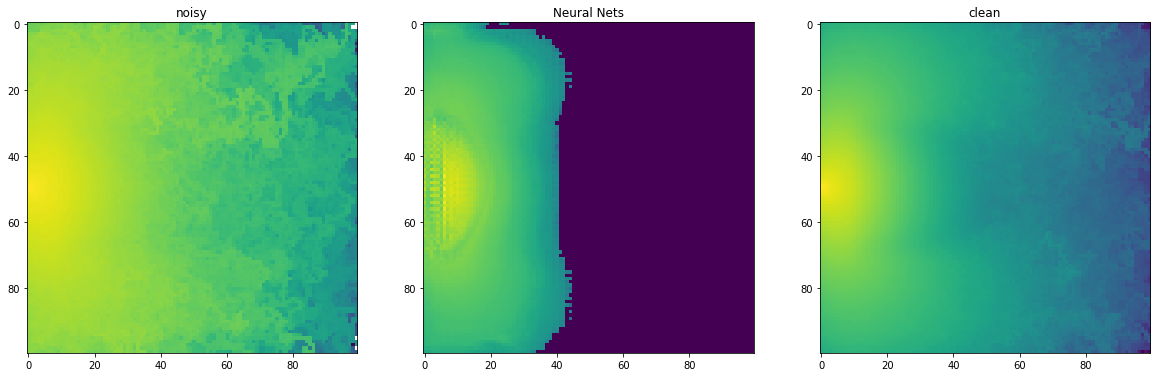

test 80



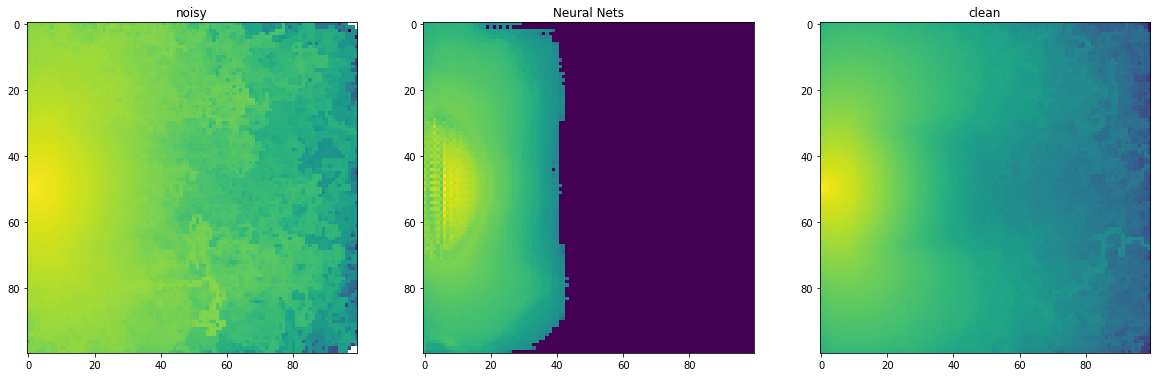

test 81



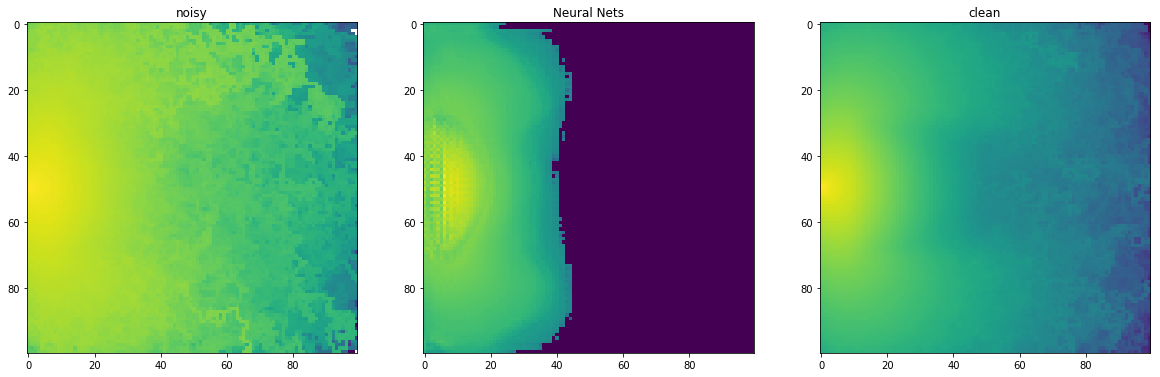

test 82



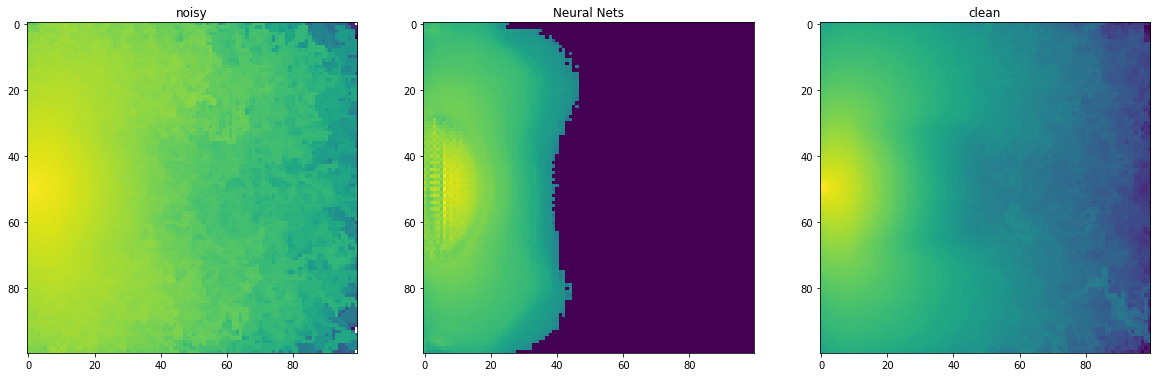

test 83



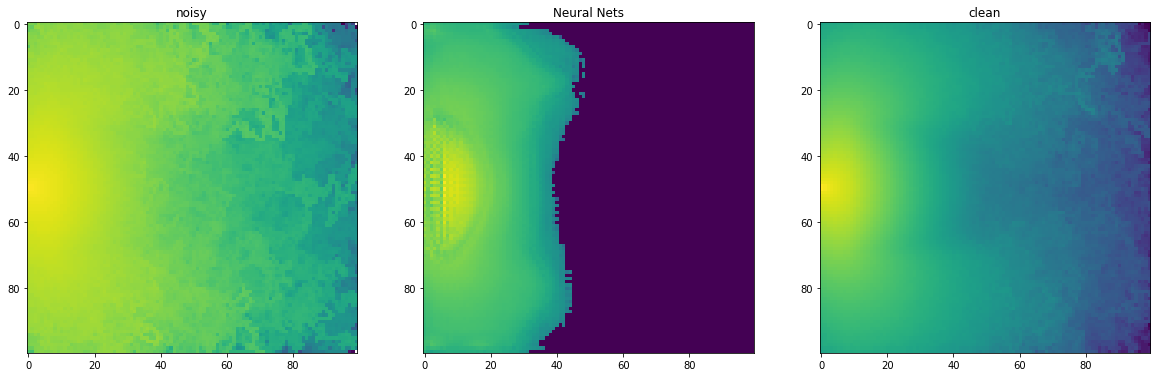

test 84



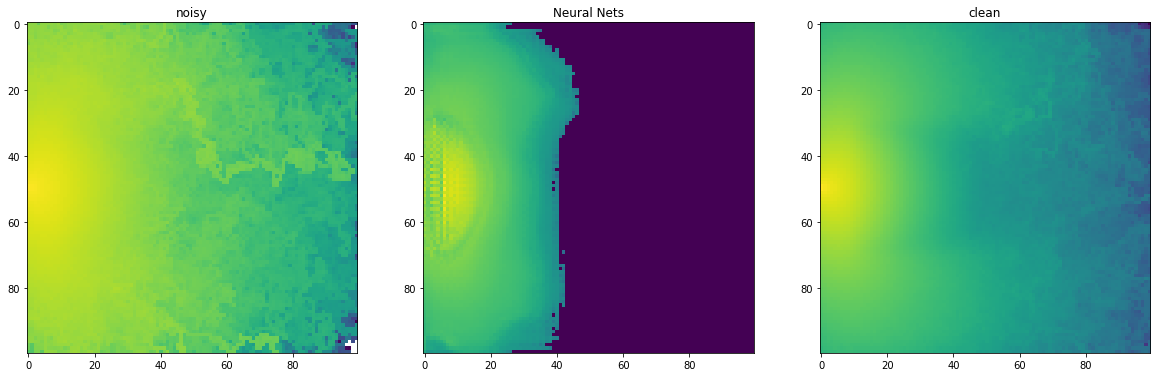

test 85



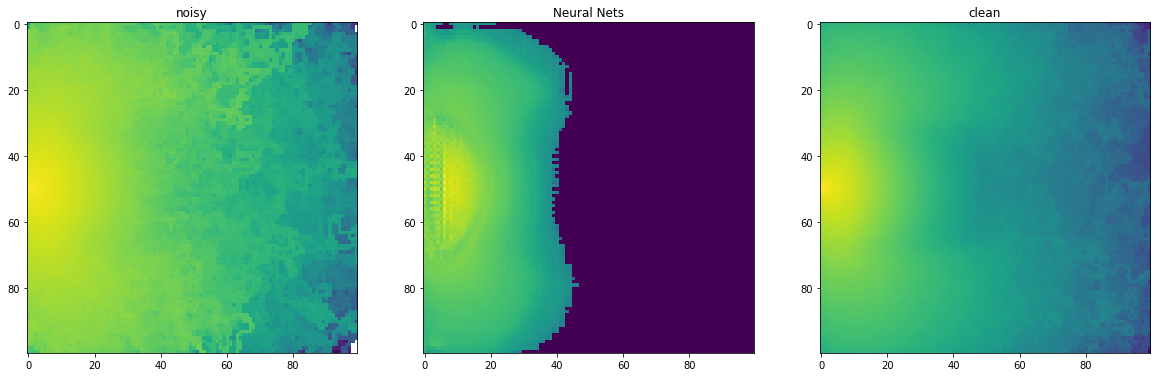

test 86



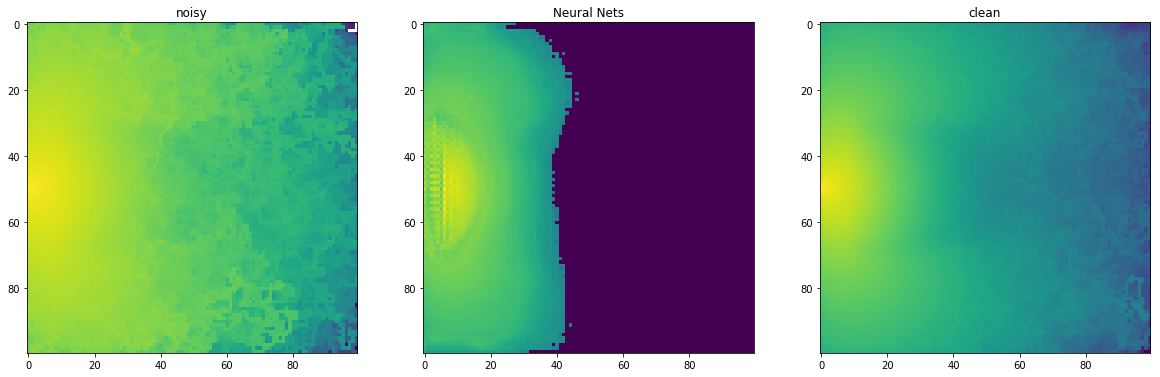

test 87



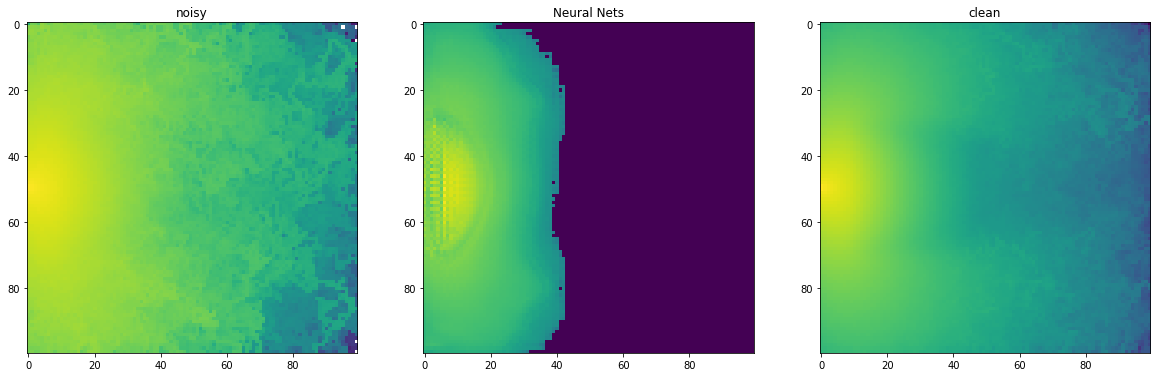

test 88



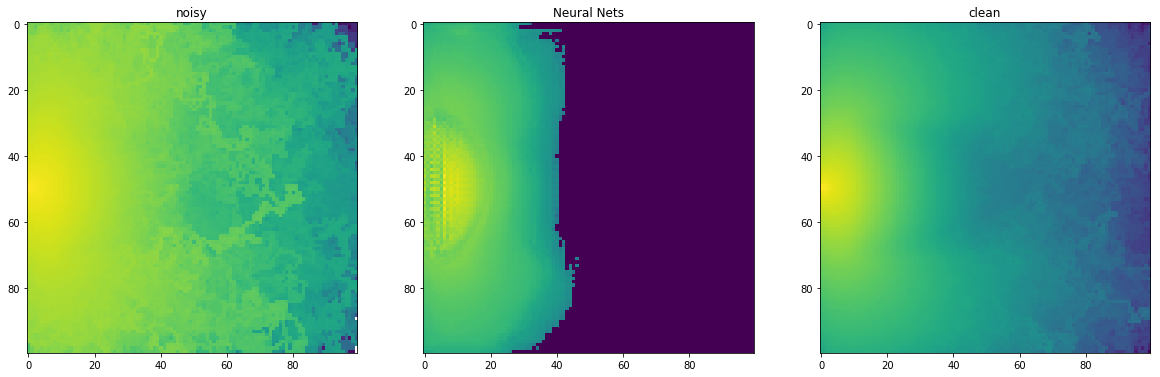

test 89



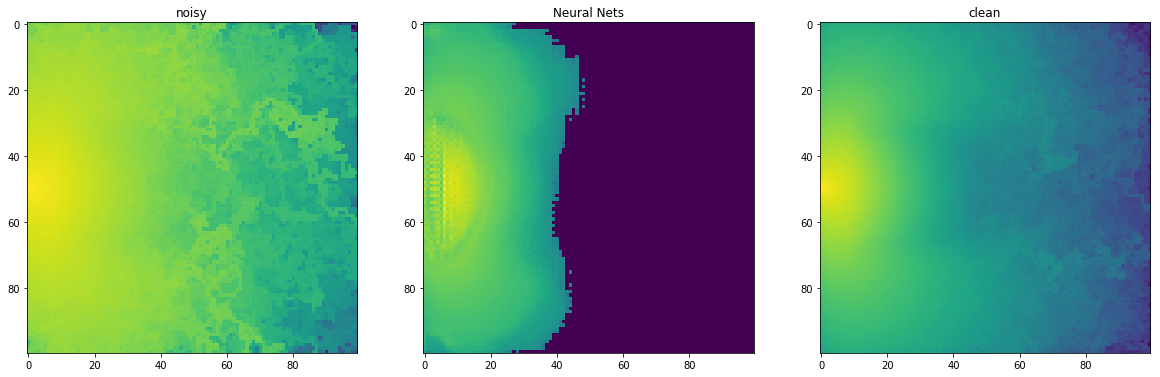

test 90



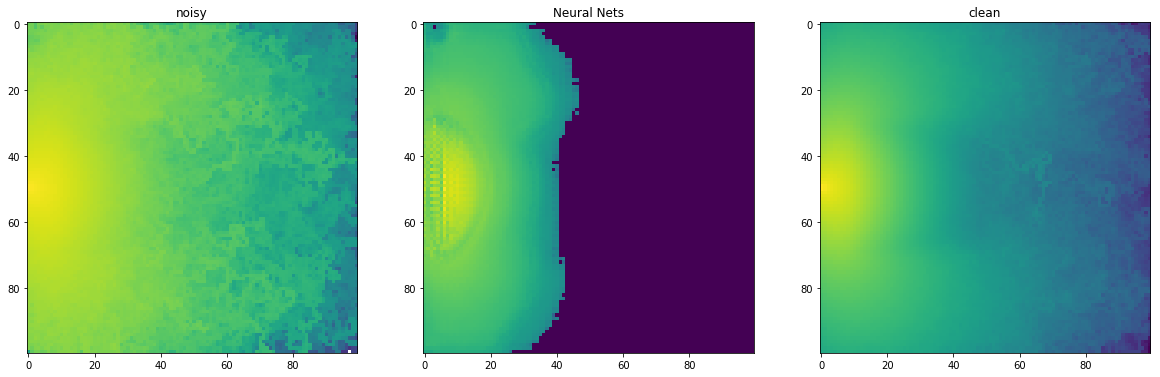

test 91



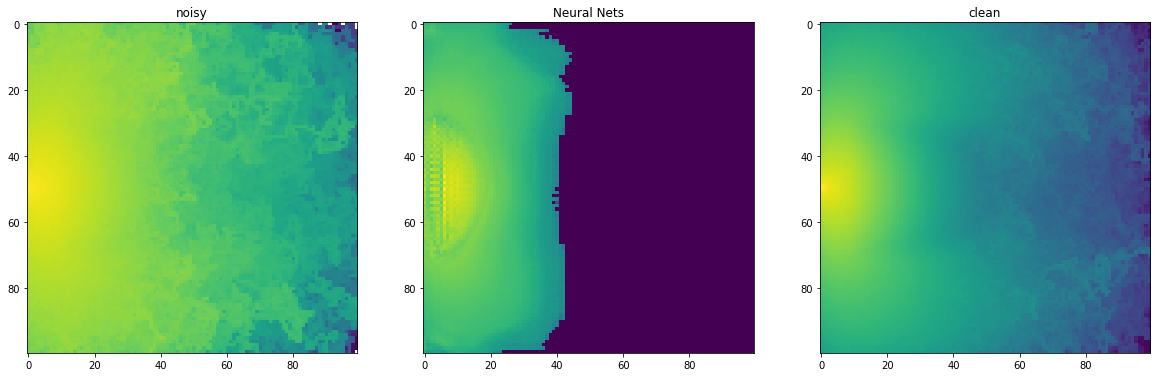

test 92



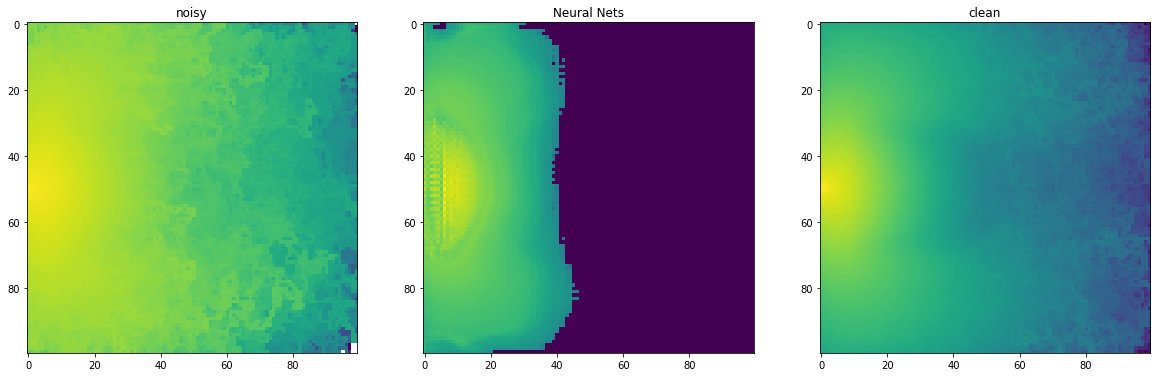

test 93



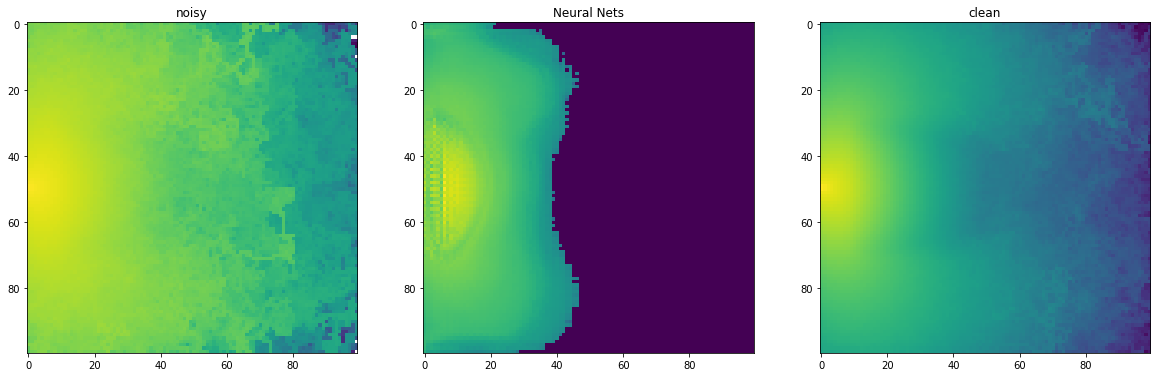

test 94



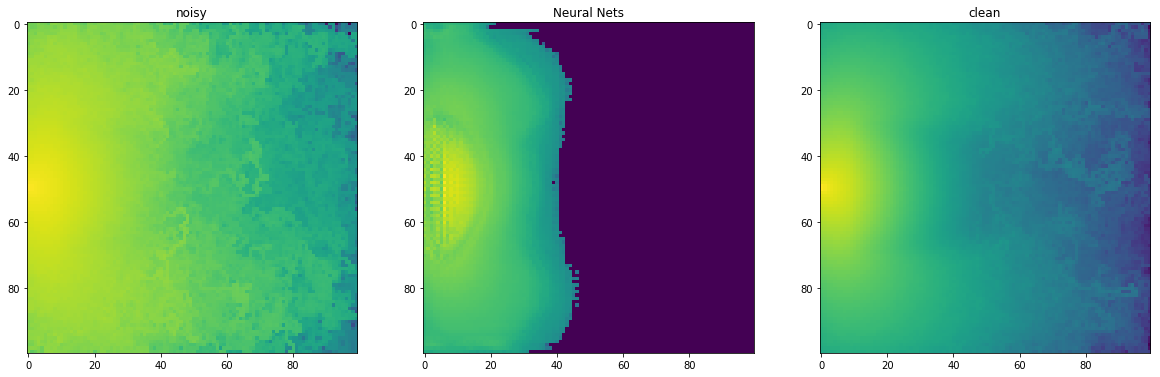

test 95



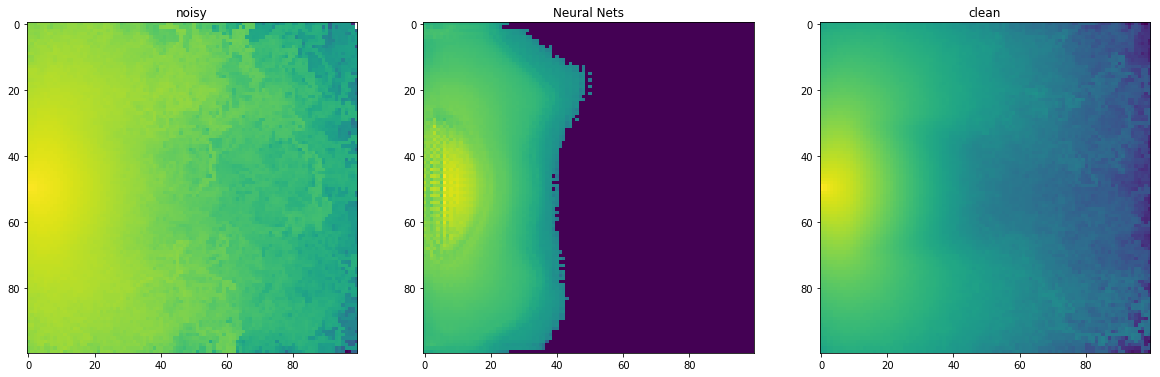

test 96



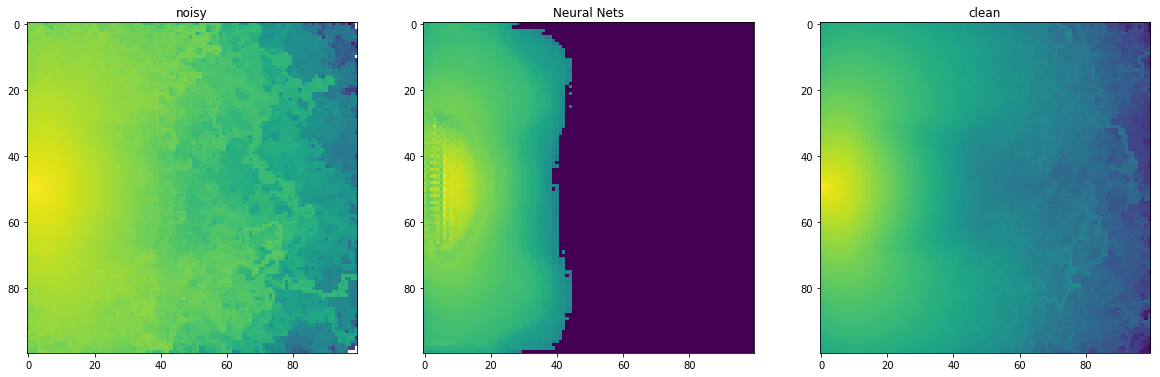

test 97



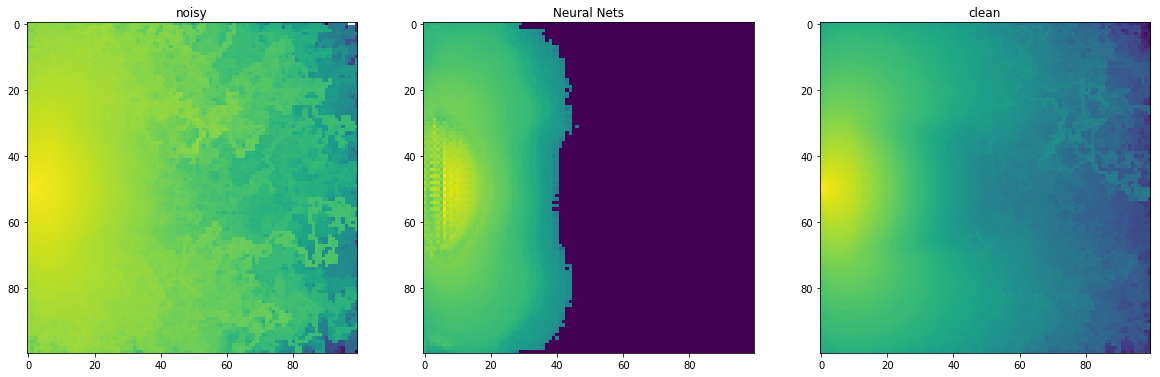

test 98



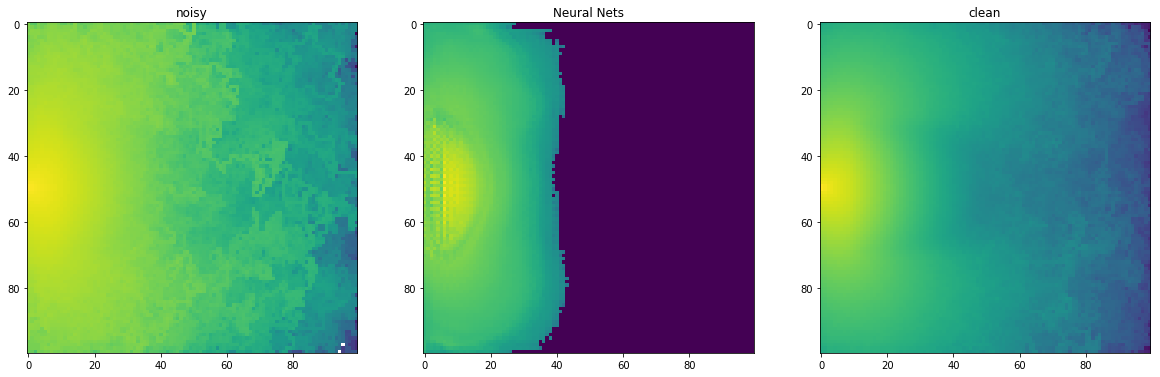

test 99



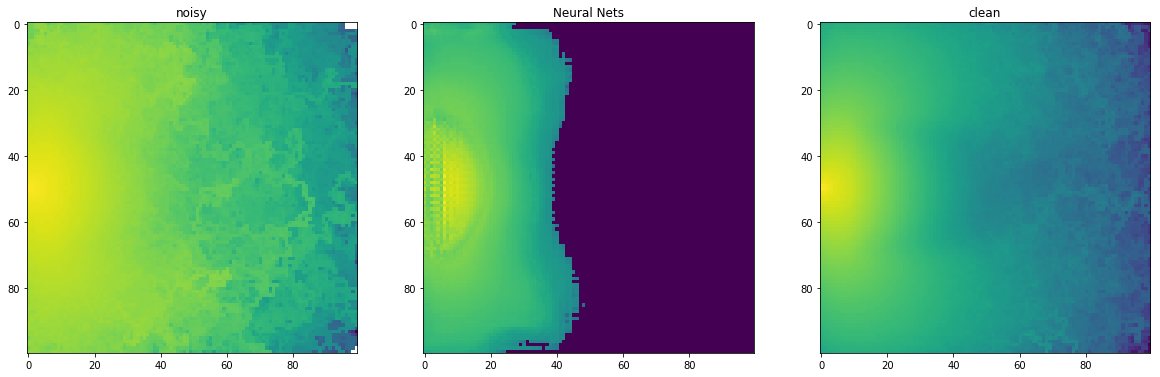

test 100



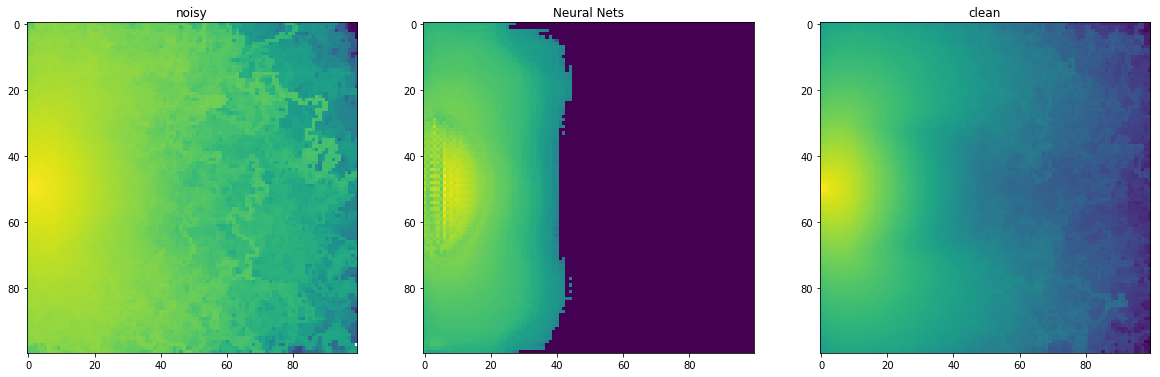

In [17]:
for i in xrange(1, 101):
    noisy_img = raw_p5[i-1,:,:]
    clean_img = raw_p7[i-1,:,:]
    nn_output = nn_data_revert[i-1,:,:]
    
    print("test {}\n".format(i))
    plot_results(noisy_img, nn_output, clean_img)